# Projet de Machine Learning 
## Gym Members Exercise Dataset
### EHRHART Elsa, SLISSE Paul, STAUB Guillaume, HOSSEINI Arman
(Notebook R)

In [1]:
#install.packages("FNN")
#install.packages("olsrr")
#install.packages("kernlab")

In [2]:
library(ggplot2)
library(gridExtra)
library(ranger)
library(dplyr)
library(liver)
library(repr)
library(tidyverse)
library(GGally)
library(e1071)
library(rpart) 
library(rpart.plot)
library(class)
library(caret)
library(plotly)
library(corrplot)
library(FNN)
library(partykit)
library(gplots)
library(reshape2)
library(olsrr)
library(nlme)
library(FactoMineR) 
library(MASS)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(nnet)
library(randomForest)
library(gbm)
library(kernlab)

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.4.2"
Warning message:
"le package 'gridExtra' a été compilé avec la version R 4.4.2"
Warning message:
"le package 'ranger' a été compilé avec la version R 4.4.3"

Attachement du package : 'dplyr'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"le package 'liver' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'repr' a été compilé avec la version R 4.4.2"
Warning message:
"le package 'tidyverse' a été compilé avec la version R 4.4.2"
Warning message:
"le package 'readr' a été compilé avec la version R 4.4.2"
Warning message:
"le package 'lubridate' a été compilé avec la version R 4.4.2"
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────

### I. Analyse exploratoire



#### 1.Importation des données

In [3]:
path <- "./gym_members_exercise_tracking.csv"
gym <- read.table(path,sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
2,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

#### 2.Nature, encodage et nettoyage des données

In [4]:
#On change les variables qualitatives en facteur
gym["Gender"]<-as.factor(gym[,"Gender"])
gym["Workout_Type"]<-as.factor(gym[,"Workout_Type"])
gym["Experience_Level"]<-as.factor(gym[,"Experience_Level"])

Les seules variables qualitatives sont $Gender$ et $Workout\_Type$. Nous avons également changé la variable $Experience\_Level$ en facteur alors que c'est originellement considéré comme une variable quantitative discrète, car le nombre de valeurs prises est petit (3). Cela nous permettra également par la suite de plus facilement faire de la classification sur cette variable. Nous avons décidé de conserver la variable $Workout\_Frequency..days.week.$ en quantitative discrète car nous pensons qu'il est plus judicieux de donner un coefficient global pour la variable que pour chaque modalité, le nombre de jour exact étant moins important que la différence de jours entre 2 individus.

In [5]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

In [6]:
find.na(gym)

[1] " No missing values (NA) in the dataset."


Notre jeu de données ne contient aucune valeur manquante, on va pouvoir continuer l'analyse en utilisant l'ensemble du jeu de données.
Nous allons maintenant regarder la distribution des variables.

#### 3.Analyse unidimensionelle

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


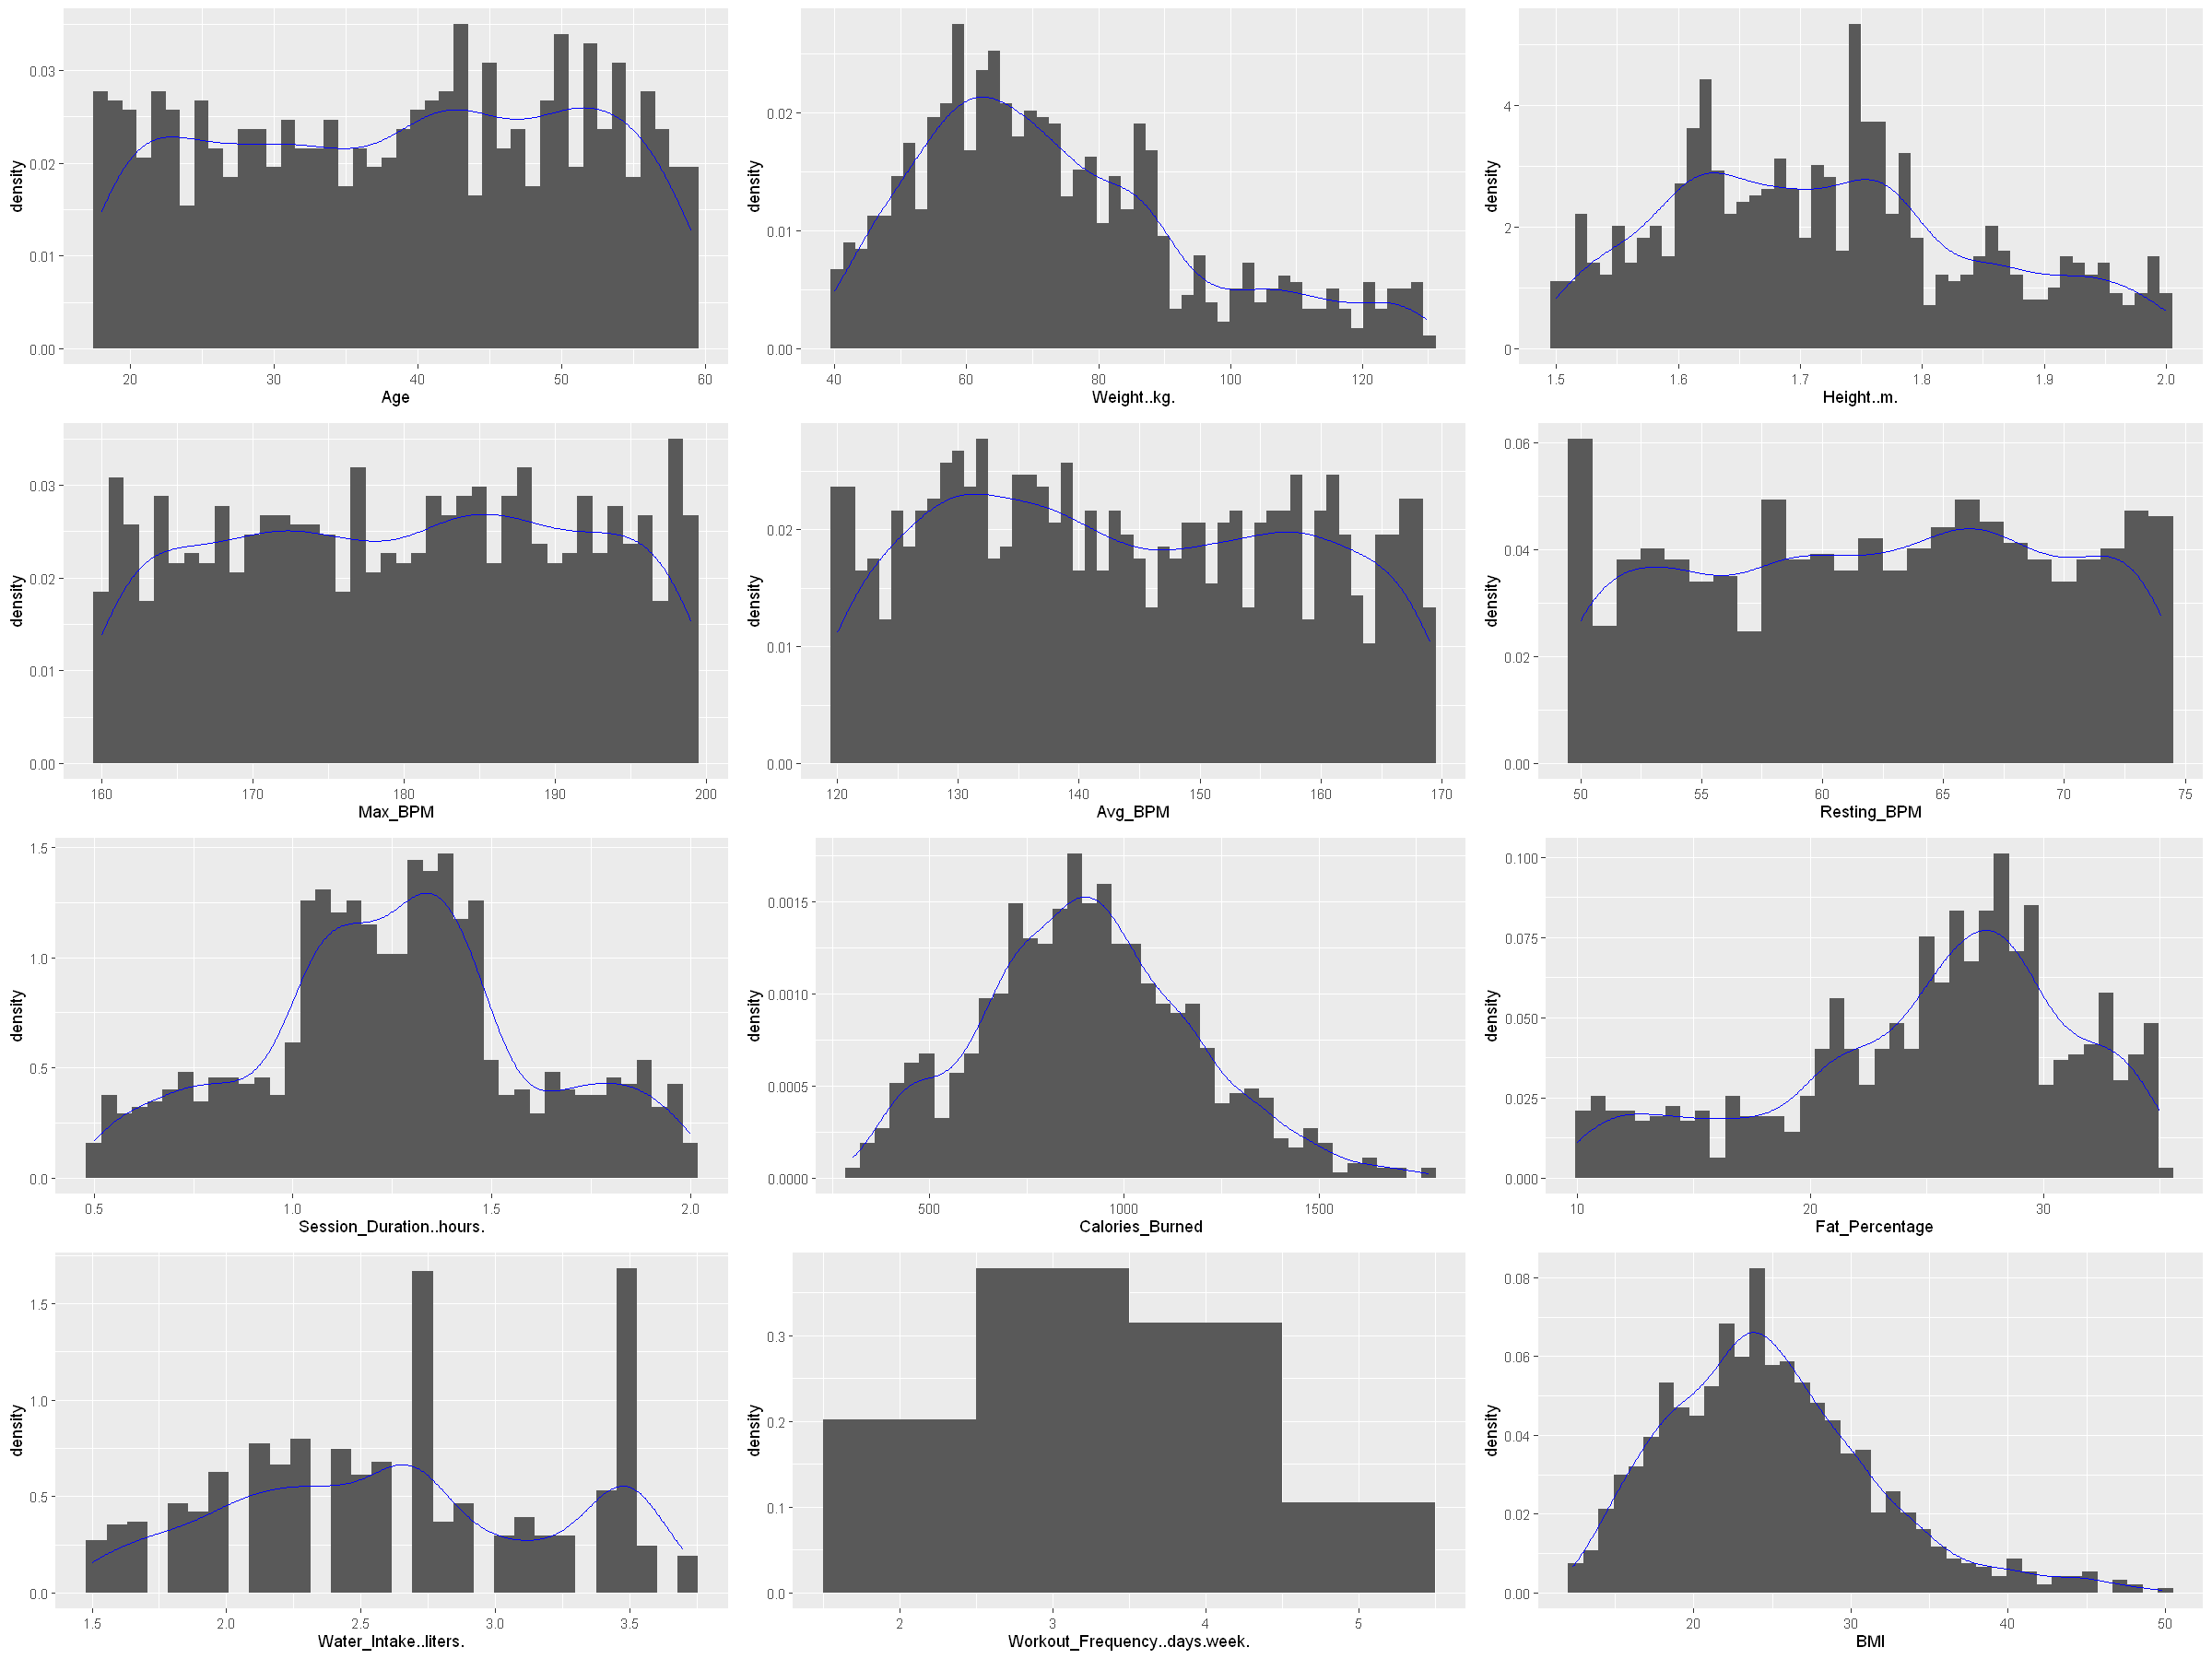

In [7]:
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=max(gym[,"Age"])-min(gym[,"Age"])+1)+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Max_BPM"])-min(gym[,"Max_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Avg_BPM"])-min(gym[,"Avg_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Resting_BPM"])-min(gym[,"Resting_BPM"])+1)+geom_density(alpha=.2, col="blue")
g7<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")
g8<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")
g9<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")
g10<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..),bins=30)+geom_density(alpha=.2, col="blue")
g11<-ggplot(gym,aes(x=Workout_Frequency..days.week.))+geom_histogram(aes(y=..density..),bins=4)
g12<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")


options(repr.plot.width=20, repr.plot.height=15)
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,ncol=3)

Analyse unidimensionnelle des variables quantitatives : 

- Age : répartition quasi-uniforme de la majorité à 60 ans
- Poids : répartition asymétrique (forme de courbe en chi-2) avec un pic aux alentours de 60kg
- Taille : répartition asymétrique, somme de deux gaussiennes, une centrée autour de 1m63 (correspondant aux femmes), et une centrée autour de 1m75 (correspondant aux hommes)
- BPM max : répartition quasi-uniforme de 160 à 200 bpm
- BPM moyen : répartition quasi-uniforme de 120 à 170 bpm
- BPM au repos : répartition quasi-uniforme de 50 à 75 bpm
- Durée de la session : répartition symétrique, similaire à une gaussienne ou une double gaussienne : on constate que les séances majoritaires sont celles entre 1h et 1h30
- Calories brûlées : répartition légèrement asymétrique, la majorité des séances brûlent moins que 1000 calories
- Pourcentage de masse graisseuse : répartition asymétrique, avec un pic autour de 27%
- Apport en eau : répartition asymétrique avec des pics aux alentours de 2.7L et 3.5L (en dehors de ces pics, on devine une gaussienne)
- Fréquence d'entraînement : la majorité des individus font 3 à 4 séances par semaine (sportifs réguliers)
- Indice de masse corporelle : répartition asymétrique (forme de courbe en chi-2) avec un pic aux alentours de 23

Analyse unidimensionnelle des variables qualitatives :

- un peu plus d'hommes que de femmes dans le jeu de données, mais ce n'est pas notable et pas suffisant pour que ça puisse biaiser nos résultats et conclusions.
- type d'entraînement : une répartition quasi-uniforme entre le cardio, l'entraînement fractionné de haute intensité (HIIT), la force athlétique et le yoga, on a donc tous types de profils.
- niveau d'expérience : majorité de personnes à niveaux 1 ou 2, le nombre de personnes de niveau 3 n'est pas négligeable bien que plus faible que les autres. Cela reflète la réalité de la population, il y a moins de personnes expérimentées qui vont à la salle de sport que de débutants ou intermédiaires. Cela ne devrait pas biaiser nos résultats d'analyse. 

On souhaite rendre les distributions asymétriques plus symétriques et "gaussiennes" pour pouvoir appliquer ensuite des techniques de modélisation linéaire. Pour cela, on teste des transformations  sur nos données et on retient celles qui donnent des résultats sensiblement plus symétriques que les distributions originelles. Ce sont les suivantes :

In [8]:
gym[,"LWeight..kg."] <- log((gym[,"Weight..kg."]))
gym[,"LBMI"] <- log((gym[,"BMI"]))

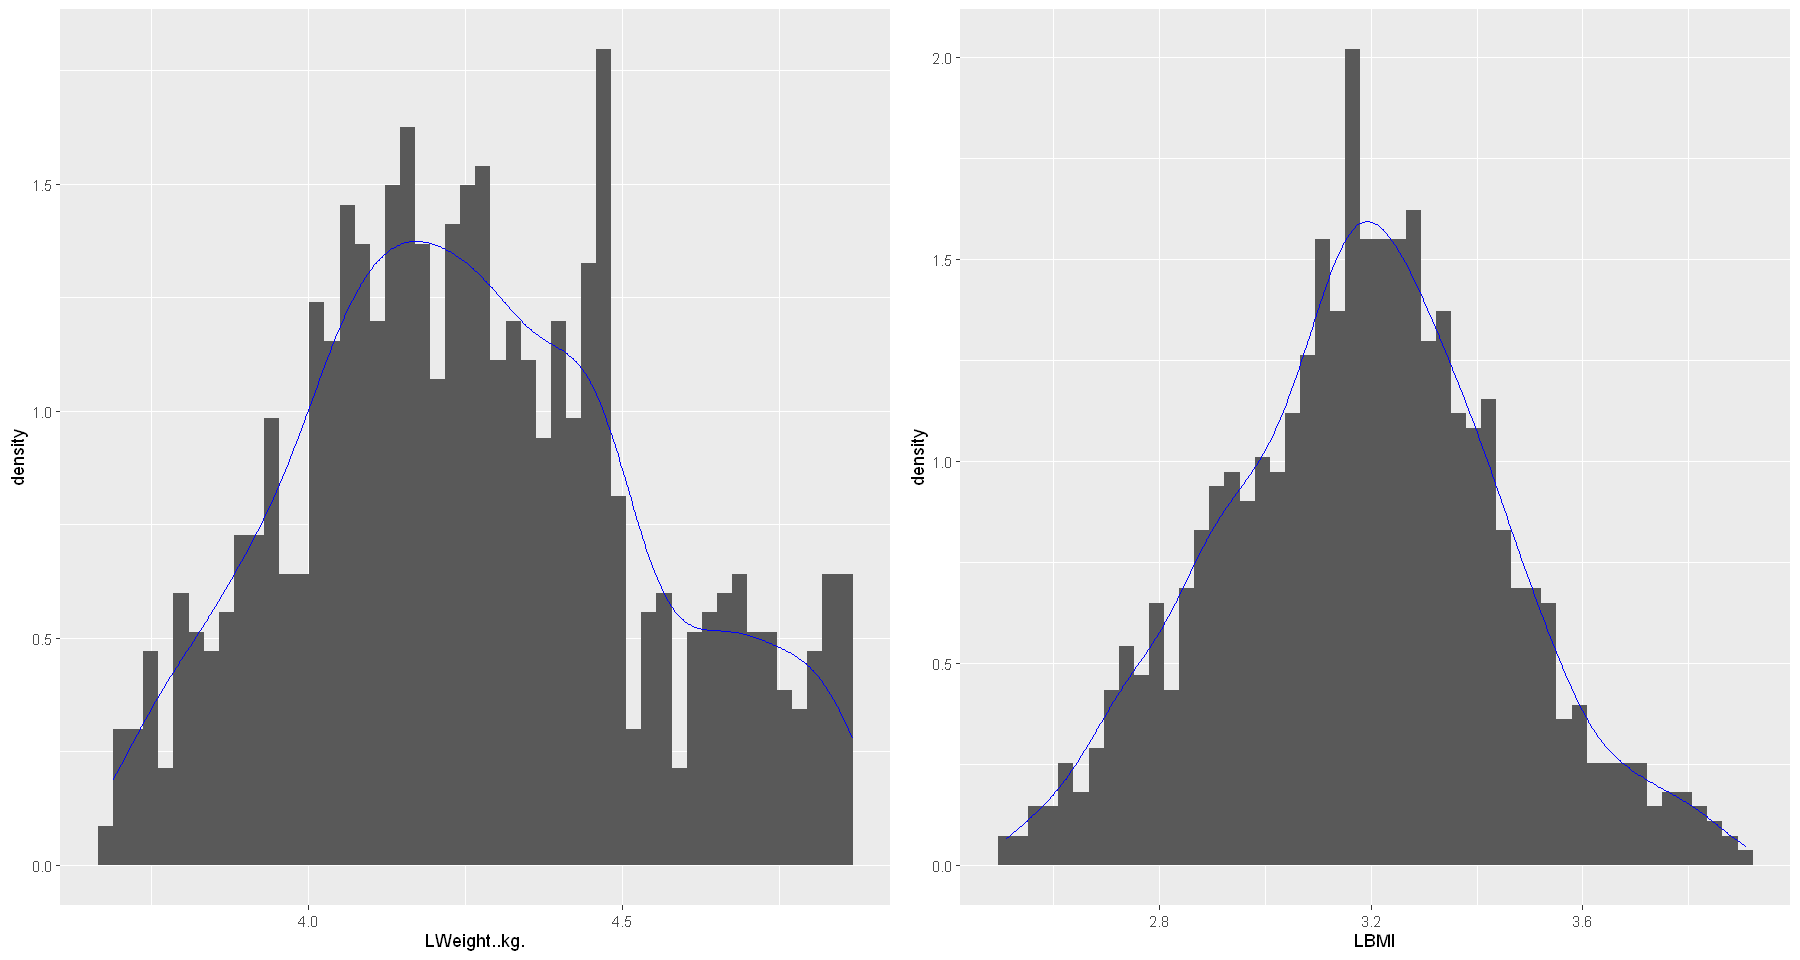

In [9]:
options(repr.plot.width=15, repr.plot.height=8)
g13<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g17<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
grid.arrange(g13,g17,ncol=2)

On peut voir que pour certaines variables comme $BMI$ la transformation a permis de faire apparaître très distinctement la symétrie (alors que pour d'autres le résultat est moins flagrant comme $Height$). 

On va désormais retirer les variables initiales et conserver les variables transformées.

In [10]:
head(gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI,LWeight..kg.,LBMI
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20,4.480740,3.407842
2,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00,4.316154,3.465736
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71,4.220977,3.207208
4,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41,3.974058,2.912894
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39,3.830813,2.666534
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55,4.060443,3.022861


In [11]:
gym<-gym[,c(1:2,4:14,16:17)]
head(gym)

,Age,Gender,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,LWeight..kg.,LBMI
,<int>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>
1,56,Male,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,4.480740,3.407842
2,46,Female,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,4.316154,3.465736
3,32,Female,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,4.220977,3.207208
4,25,Male,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,3.974058,2.912894
5,38,Male,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,3.830813,2.666534
6,56,Female,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,4.060443,3.022861


### 4.Analyse Bidimensionelle

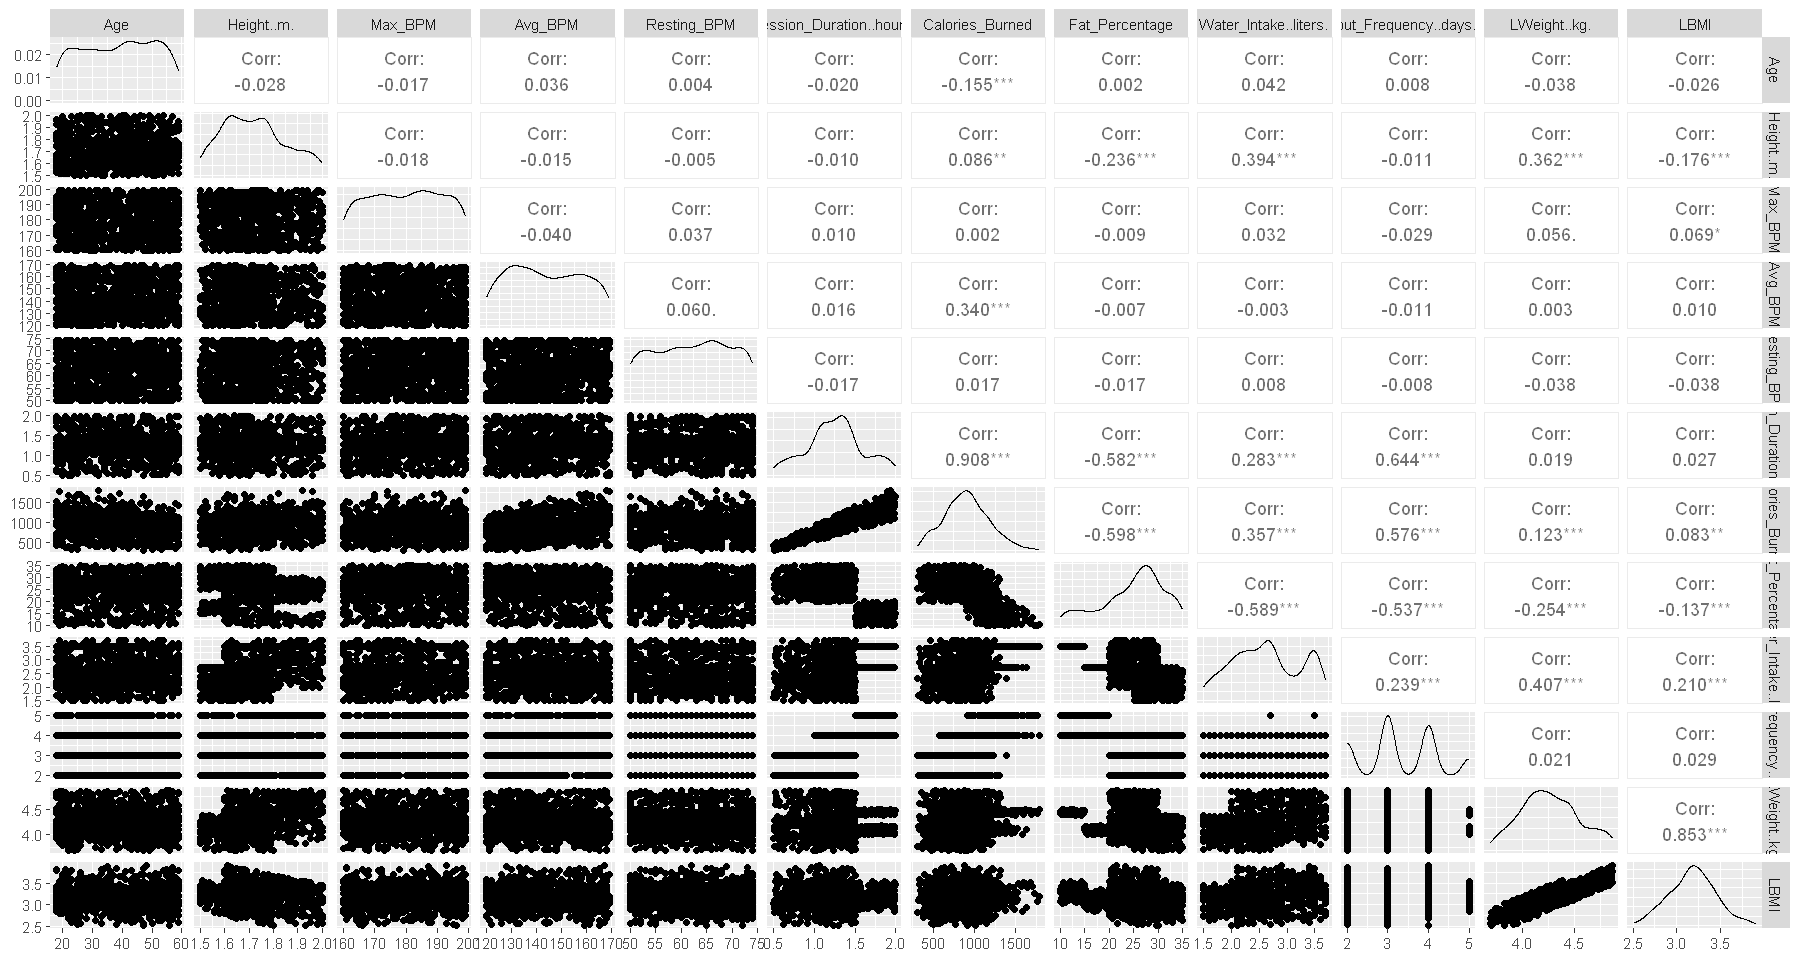

In [12]:
gym_num <- gym[, -c(2, 9, 13)]
ggpairs(gym_num)

On peut voir que l'on obtient des graphes où l'on a des points partout comme entre `Age` et `Height`. Ce n'est pas forcément une mauvaise chose, cela nous dit que notre jeu de données est bien uniforme et non biaisé car on a des gens de tout âge et toute taille.

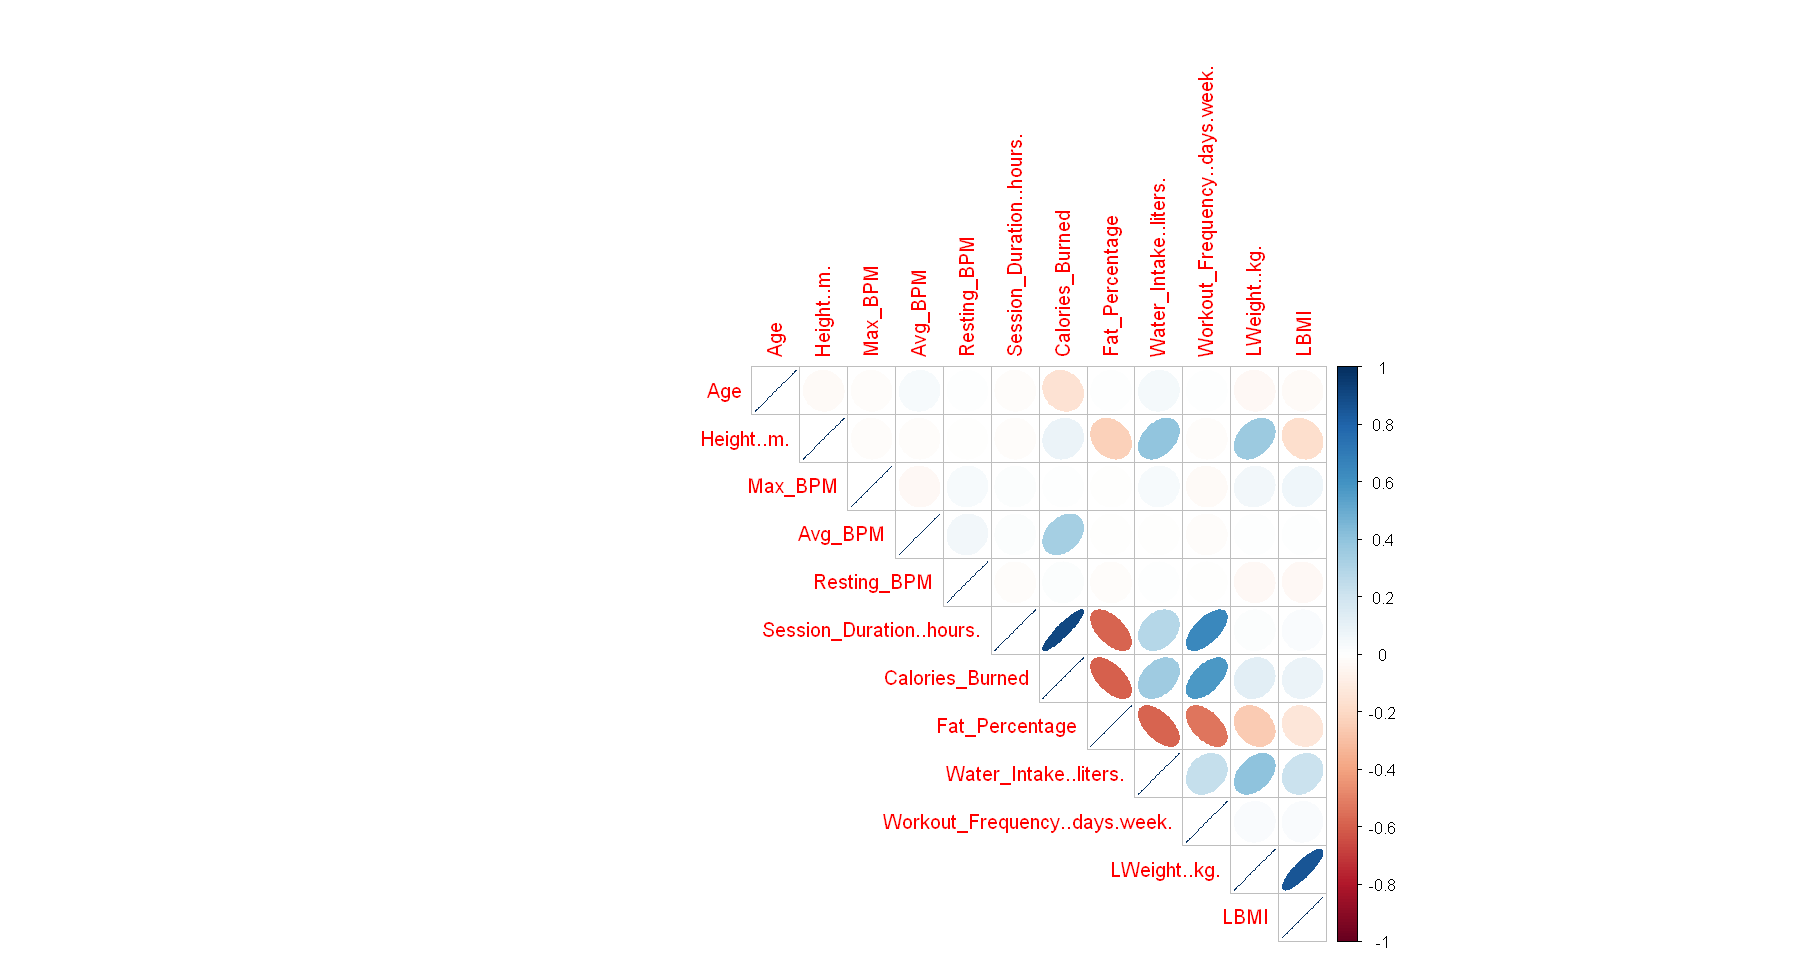

In [13]:
corrplot(cor(gym_num), method="ellipse",type="upper")

On remarque les corrélations significatives suivantes :

- les individus qui font des sessions plus longues brûlent davantage de calories par session (ce qui est cohérent), une relation linéaire semble en effet se dessiner entre ces deux variables
- les individus qui font des sessions plus longues ont tendance à avoir des pourcentages de masse graisseuse plus bas
- les individus qui font des sessions plus longues ont tendance à faire des séances plus souvent
- les individus qui brûlent beaucoup de calories par session ont tendance à avoir des pourcentages de masse graisseuse plus bas
- les individus qui brûlent beaucoup de calories par session ont tendance à faire des séances plus souvent
- les individus qui ont des pourcentages de masse graisseuse plus bas consomment davantage d'eau (ce qui est surprenant dans une certaine mesure!)
- les individus qui ont des pourcentages de masse graisseuse plus bas ont tendance à faire des séances plus souvent (cohérent)
- plus les individus sont lourds, plus leur IMC a tendance à être elevé (ce qui est cohérent car c'est l'un des facteurs rentrant dans le calcul de l'IMC), on observe en effet une relation linéaire entre le log de ces deux variables, ce qui est cohérent car IMC=masse/taille**2

### 5. ACP

On va chercher par la suite à prédire le nombre de calories brûlées en fonction des autres variables, on retire donc cette variable pour réaliser l'ACP.

In [14]:
# ACP réduite
acp <- PCA(gym, scale.unit = TRUE,
           graph = FALSE, quanti.sup=8,quali.sup = c(2,9,13), ncp=6)


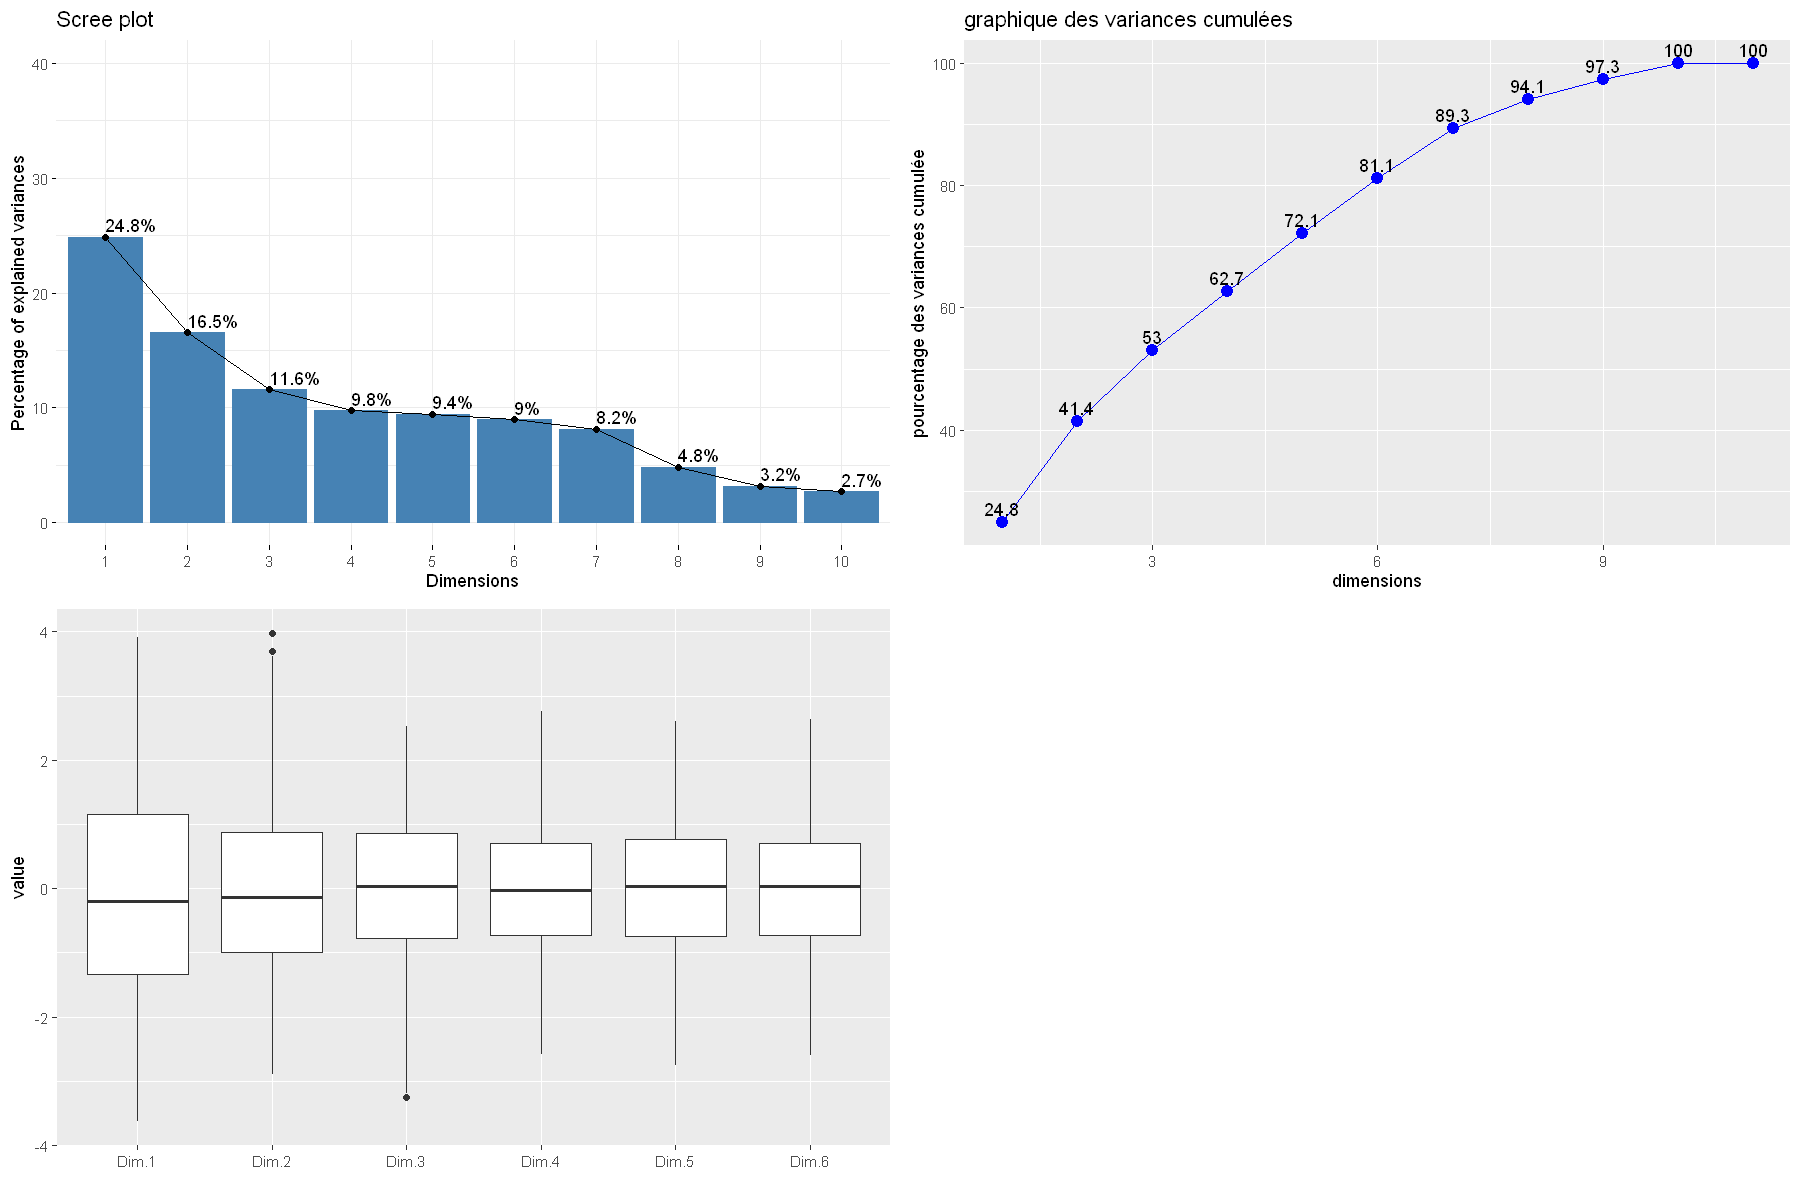

In [15]:
options(repr.plot.width = 15, repr.plot.height = 10) 
# Décroissance des valeurs propres
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))

#variance cumulées 
cum_var <- cumsum(acp$eig[, 2]) 

# Graphique avec ggplot2
g2<-ggplot(data.frame(Dimension = 1:length(cum_var), Variance = cum_var), aes(x = Dimension, y = Variance)) +
    geom_point(size = 3, color = "blue") +
    geom_line(color = "blue") +
    labs(title = "graphique des variances cumulées",x='dimensions', y = "pourcentage des variances cumulée") +
    geom_text(aes(y = cum_var, label = round(cum_var, 1)), vjust = -0.5, color = "black") 

g3<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,g3,ncol=2)

On choisit de garder six dimensions pour expliquer 80% de la variance. On aurait pu également garder moins de dimensions pour une meilleure visualisation car on observe un coude dans la variance expliquée par les dimensions à partir de 3, mais cela nous ferait perdre beaucoup d'information.

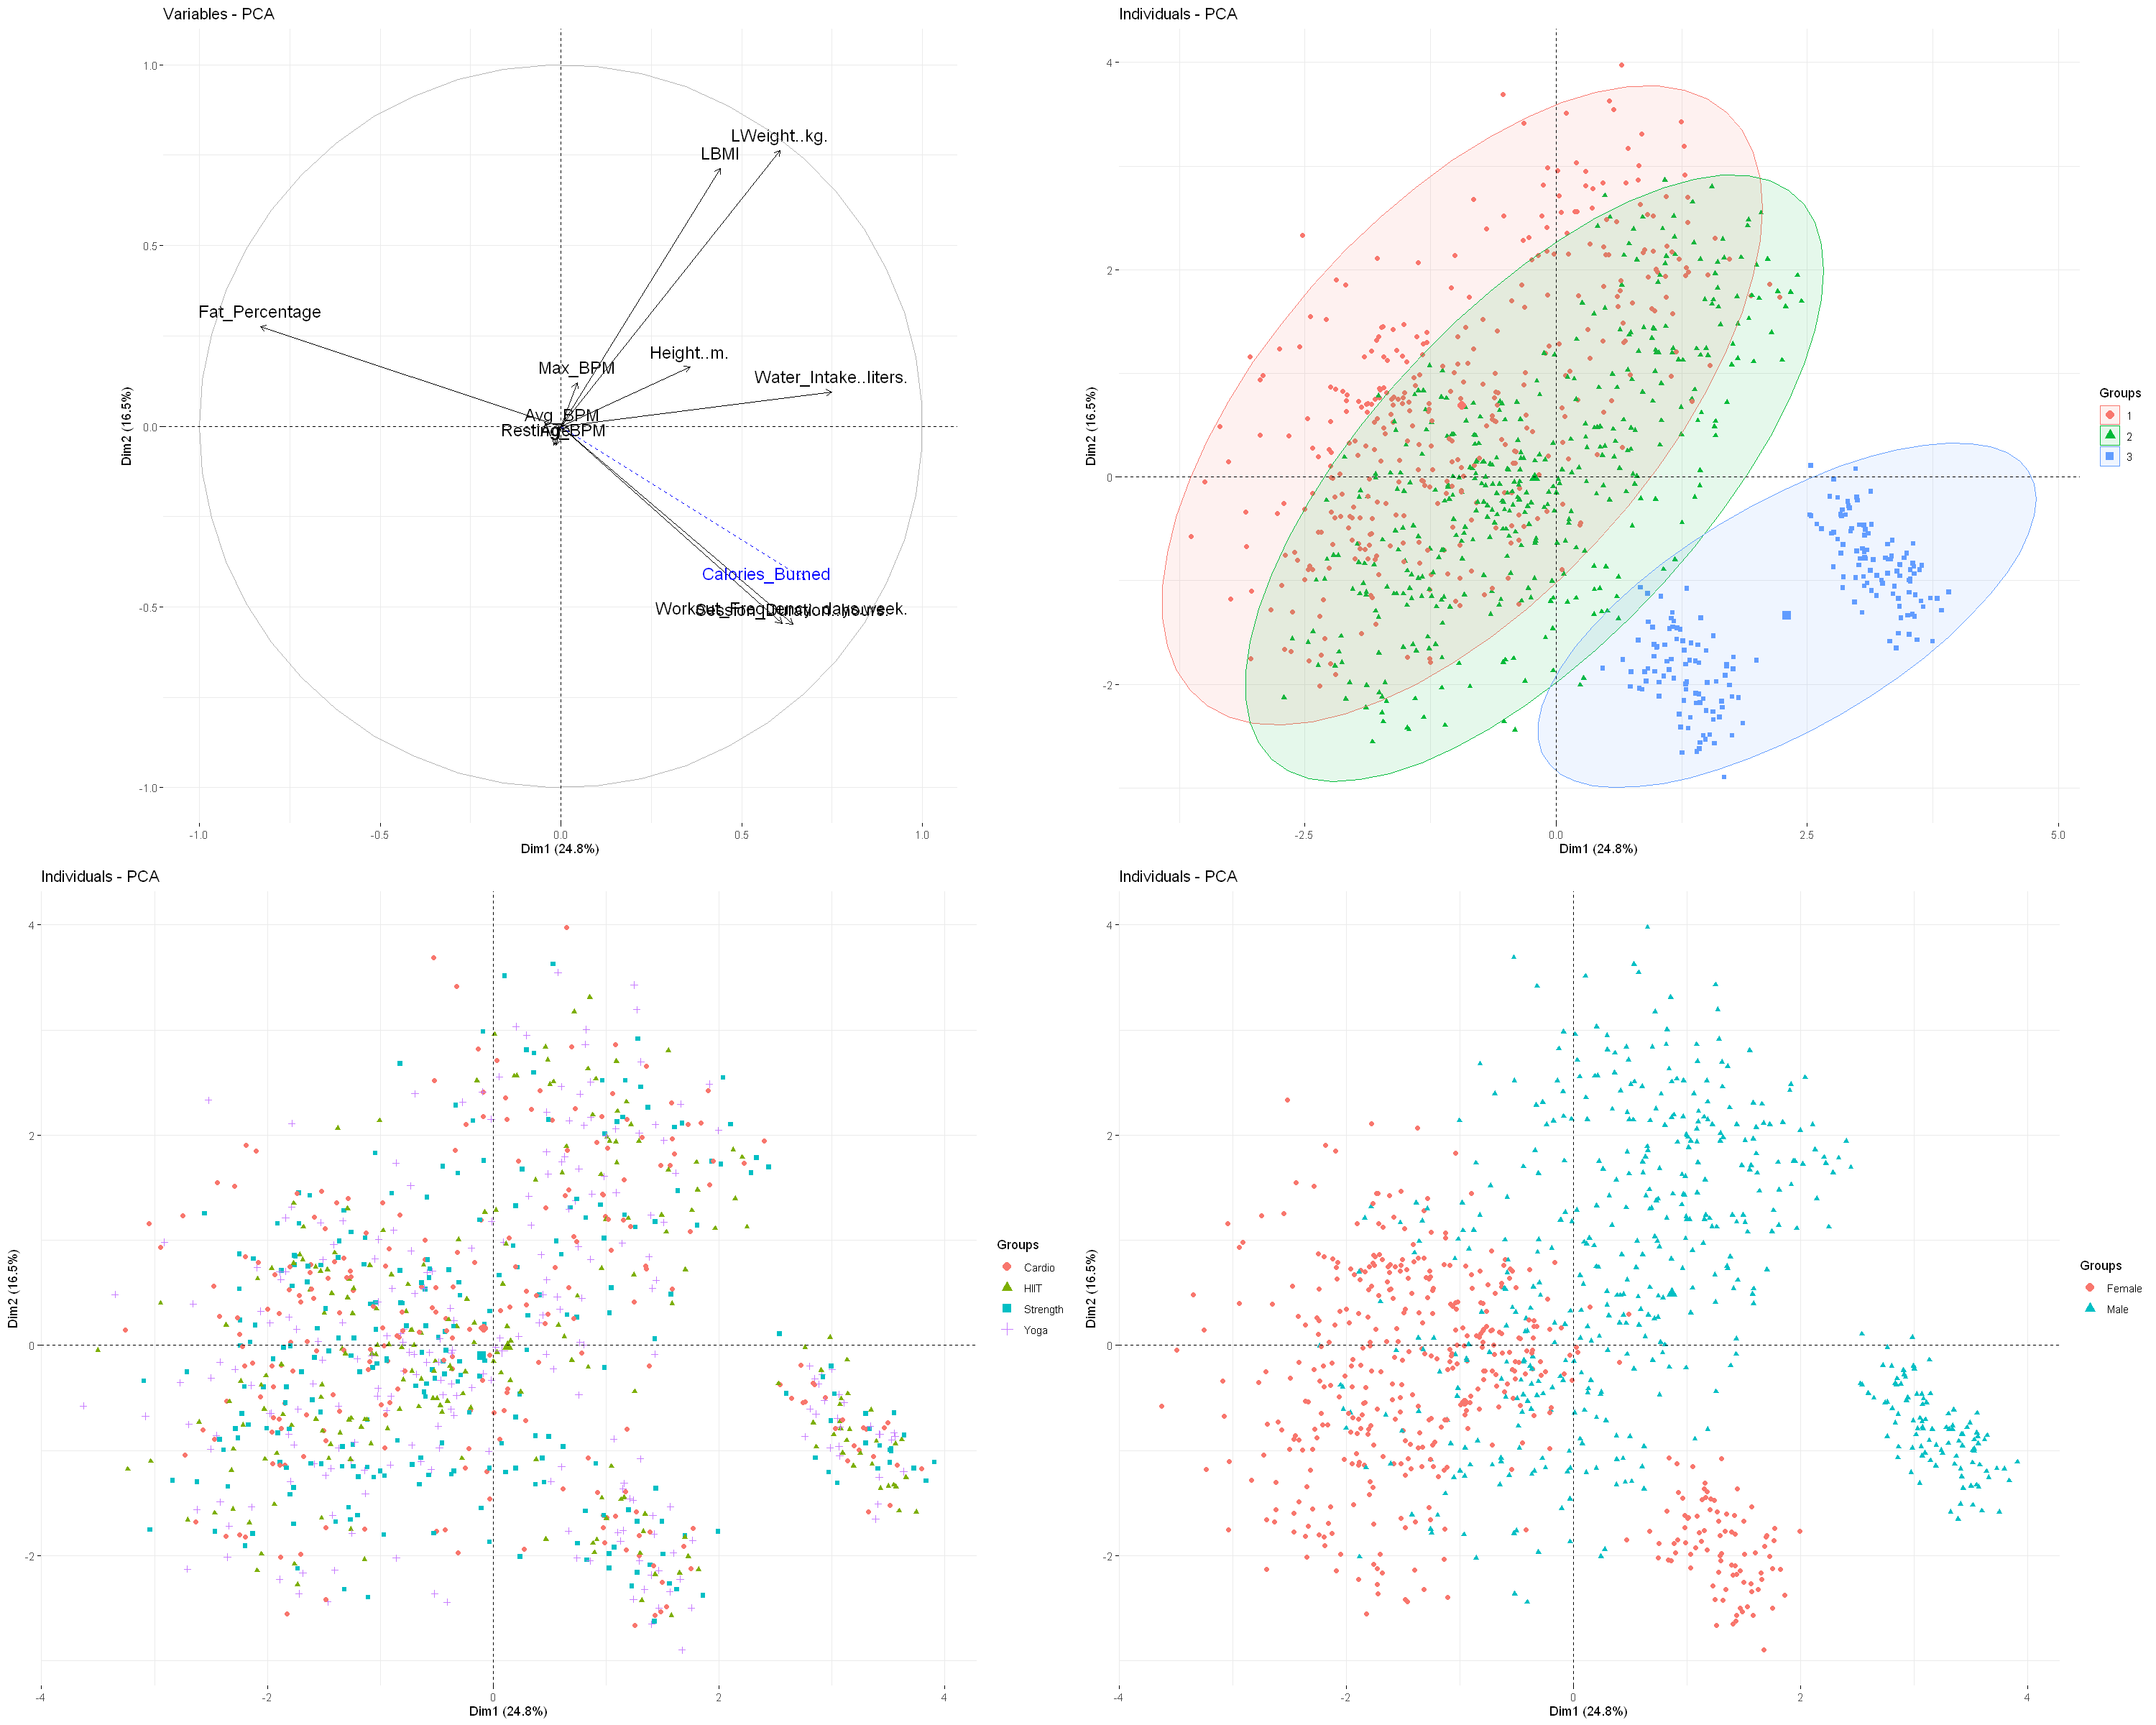

In [16]:
options(repr.plot.width = 25, repr.plot.height = 20) 
g4<-fviz_pca_var(acp,labelsize = 5)
g5<-fviz_pca_ind(acp, habillage=gym$Experience_Level,label="none",addEllipses=TRUE, ellipse.level=0.95)
g6<-fviz_pca_ind(acp, habillage=gym$Workout_Type,label="none")
g7<-fviz_pca_ind(acp, habillage=gym$Gender,label="none")

grid.arrange(g4,g5,g6,g7,nrow=2,ncol=2)


Il semble difficile d'expliciter ce que pourraient représenter les dimensions. Néanmoins, on peut voir que la dimension 1 semble lié au niveau d'expérience. En effet, on peut observer sur le graphique des individus que la séparation entre le groupe d'expérience 3 (experts) et les autres semble bien linéaire. En regardant le graphe des variables, on voit que le pourcentage de masse graisseuse a une contribution fortement négative à la dimension 1 à l'opposé de la durée des sessions, le nombre de sessions, la consommation d'eau qui ont une contribution positive. Cela représente donc bien la régularité d'entraînement et le niveau.

Lorsque l'on colorie en fonction du type d'entrainement, on observe pas de séparations claires dans le premier plan factoriel.

On remarque que pour le groupe d'experts (expérience 3), on distingue 2 groupes distincts dans le premier plan factoriel. En regardant les variables dans le premier plan factoriel, cette séparation semble pouvoir être expliquée par le poids et la taille, on en déduit une potentielle discrimination de genre. En coloriant selon le genre dans le premier plan factoriel, on confirme cette hypothèse.

Comme vu dans le corrplot, les calories brûlées sont corrélées positivement avec le nombre de sessions, la durée des sessions et négativement avec le pourcentage de masse graisseuse, ainsi on s'attend bien à ce qu'elle soit corrélées positivement avec la dimension 1.

On effectue une seconde ACP avec le nombre de calories brulées dans le but futur de prédire le niveau d'expérience. On ne va pas l'interpréter car les résultats sont très similaires à l'ACP précédente, elle nous servira juste pour la classification selon l'expérience.

In [17]:
acp_level <- PCA(gym, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(2,9,13), ncp=6)

## II. Prédiction des calories brûlées

In [18]:
MSE <- function(Y, Y_pred) {
  return(mean((Y - Y_pred)^2))
}

R2 <- function(Y, Y_pred) {
  ssr <- sum((Y - Y_pred)^2)
  sst <- sum((Y - mean(Y))^2)
  return(1-ssr/sst)
}


### 1. Division en échantillon d'apprentissage et en échantillon de test

In [19]:
set.seed(1)

# 1. Colonnes catégorielles → variables indicatrices (one-hot encoding)
gym_dummies <- model.matrix(~ Gender + Workout_Type + Experience_Level - 1, data = gym) %>% as.data.frame()

# 2. Colonnes numériques (quantitatives)
gym_quant <- gym %>% dplyr::select(
  Age, Height..m., Max_BPM, Avg_BPM, Resting_BPM,
  Session_Duration..hours., Fat_Percentage, Water_Intake..liters.,
  Workout_Frequency..days.week., LWeight..kg., LBMI
)

# 3. Combinaison des deux en un seul dataset
gym_new <- bind_cols(gym_dummies, gym_quant)

# 4. Variable cible
calories_burned <- gym$Calories_Burned
#use 80% of dataset as training set and 20% as test set
sample <- sample(c(TRUE, FALSE), nrow(gym_new), replace=TRUE, prob=c(0.8,0.2))
gym_train  <- gym_new[sample, ]
gym_test   <- gym_new[!sample, ]
calories_burned_train <- calories_burned[sample]
calories_burned_test <- calories_burned[!sample]

gym_r <- scale(gym_new)
# Standardisation des données d'entraînement
gymr_train <- gym_r[sample, ]
gymr_test <- gym_r[!sample, ]

Cette étape est nécessaire car on aurait un estimateur trop optimiste de l'erreur de généralisation si on testait sur le même échantillon que celui utilisé pour l'apprentissage. On standardise le jeu de données sans les calories brûlées car certaines méthodes (SVR, réseau de neurones) sont plus adaptées pour des données standardisées.

### 2. Prédiction avec un modèle linéaire

On va utiliser un modèle linéaire classique et pas généralisé car dans l'analyse exploratoire, on a observé que la distribution des calories brûlées semblait gaussienne (et non Poisson ou gamma).

#### a. Modèle complet


Call:
lm(formula = calories_burned_train ~ ., data = gym_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.992  -24.789   -1.877   21.433  174.012 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -800.7590   230.6708  -3.471 0.000547 ***
GenderFemale                   -87.2463     5.7834 -15.086  < 2e-16 ***
GenderMale                           NA         NA      NA       NA    
Workout_TypeHIIT                 0.7309     4.1059   0.178 0.858759    
Workout_TypeStrength             1.2715     3.9818   0.319 0.749564    
Workout_TypeYoga                -2.5736     4.0678  -0.633 0.527139    
Experience_Level2               -6.5321     4.7140  -1.386 0.166249    
Experience_Level3              -10.1113    11.1583  -0.906 0.365133    
Age                             -3.4081     0.1186 -28.746  < 2e-16 ***
Height..m.                      22.2619   288.7076   0.

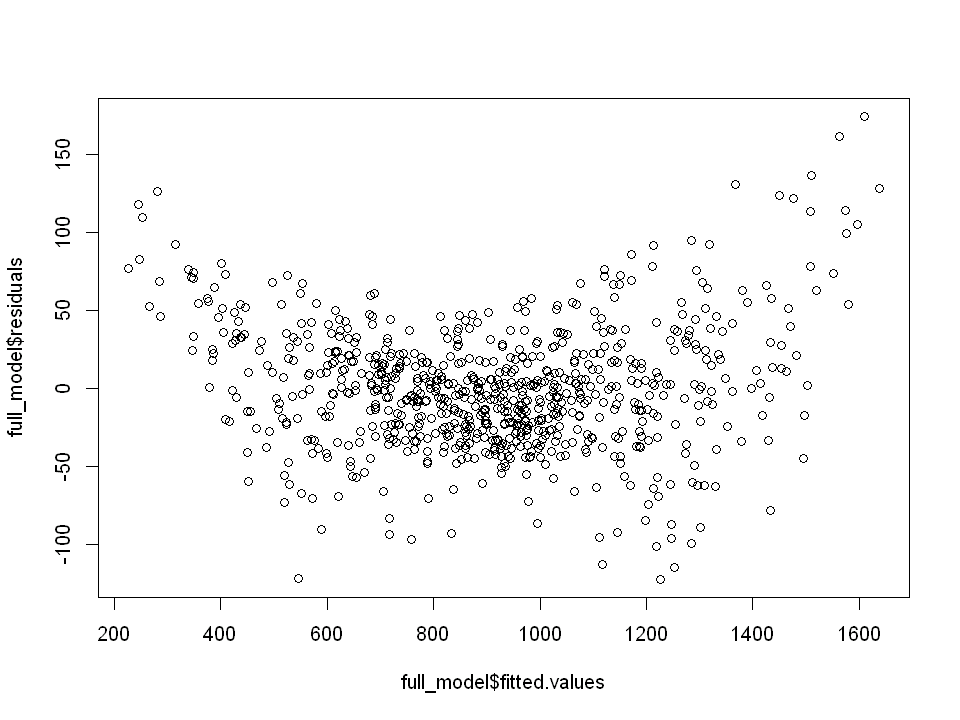

In [20]:
t1<-Sys.time()
full_model<-lm(calories_burned_train~.,data=gym_train)
t2<-Sys.time()
lin_reg_duration=t2-t1
summary(full_model)
options(repr.plot.width=8,repr.plot.height=6)
plot(full_model$fitted.values, full_model$residuals)

Les variables importantes dans la prédiction des calories brûlées sont le genre, l'âge, le BPM moyen, le BPM au repos et la durée de la session. Les autres ne semblent pas avoir une réelle influence (p-valeur > 0.05), on pourra donc essayer un modèle de forward-selection basée sur l'AIC. En affichant le graphe des résidus, les hypothèses du modèle linéaire ne sont pas respectées : on n'a pas l'homoscédasticité, il semble y avoir une dépendance quadratique des résidus en fonction des valeurs prédites.

In [21]:
pred_full_model <- predict(full_model, gym_test)
mse_lm_full <- MSE(calories_burned_test,pred_full_model)
R2_lm_full <- R2(calories_burned_test,pred_full_model)
bic_lm_full <- BIC(full_model)
paste("MSE: ",mse_lm_full,sep="")
paste("R2: ",R2_lm_full ,sep="")
paste("BIC: ",bic_lm_full,sep="")

[1] "MSE: 1560.74172215944"

[1] "R2: 0.977028793703263"

[1] "BIC: 8058.09542671727"

#### b. Avec une forward-selection basée sur l'AIC (sans et avec interactions)

In [22]:
t1<-Sys.time()
empty_model<-lm(calories_burned_train~1,data=gym_train)
model_lin_forward <- stepAIC(empty_model, direction = "forward", scope = formula(full_model))
t2<-Sys.time()
lin_fwd_reg_duration<-t2-t1
summary(model_lin_forward)

Start:  AIC=8754.92
calories_burned_train ~ 1

                                Df Sum of Sq      RSS    AIC
+ Session_Duration..hours.       1  48962880 10099619 7381.1
+ Experience_Level3              1  25331071 33731429 8320.5
+ Fat_Percentage                 1  21425635 37636864 8405.9
+ Workout_Frequency..days.week.  1  18956030 40106470 8455.4
+ Water_Intake..liters.          1   7920405 51142094 8644.8
+ Avg_BPM                        1   7324149 51738350 8653.8
+ Age                            1   1696642 57365858 8734.2
+ GenderFemale                   1   1447310 57615189 8737.6
+ GenderMale                     1   1447310 57615189 8737.6
+ LWeight..kg.                   1    973327 58089173 8744.0
+ LBMI                           1    474654 58587846 8750.6
+ Height..m.                     1    440186 58622314 8751.1
<none>                                       59062499 8754.9
+ Workout_TypeStrength           1    108858 58953642 8755.5
+ Resting_BPM                    1    


Call:
lm(formula = calories_burned_train ~ Session_Duration..hours. + 
    Avg_BPM + GenderFemale + Age + Resting_BPM + LBMI, data = gym_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-124.411  -25.248   -2.872   21.775  176.015 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -773.24324   26.97973 -28.660   <2e-16 ***
Session_Duration..hours.  716.89618    4.14807 172.826   <2e-16 ***
Avg_BPM                     6.23178    0.09936  62.718   <2e-16 ***
GenderFemale              -87.30892    2.98047 -29.294   <2e-16 ***
Age                        -3.41142    0.11695 -29.169   <2e-16 ***
Resting_BPM                 0.47718    0.19553   2.440   0.0149 *  
LBMI                        8.41659    5.56825   1.512   0.1311    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.64 on 772 degrees of freedom
Multiple R-squared:  0.9795,	Adjusted R-squared:  0.9793 
F-statist

Les variables sélectionnées sont la durée de la session, le BPM moyen, le genre, l'âge, le BPM au repos et le log-IMC.

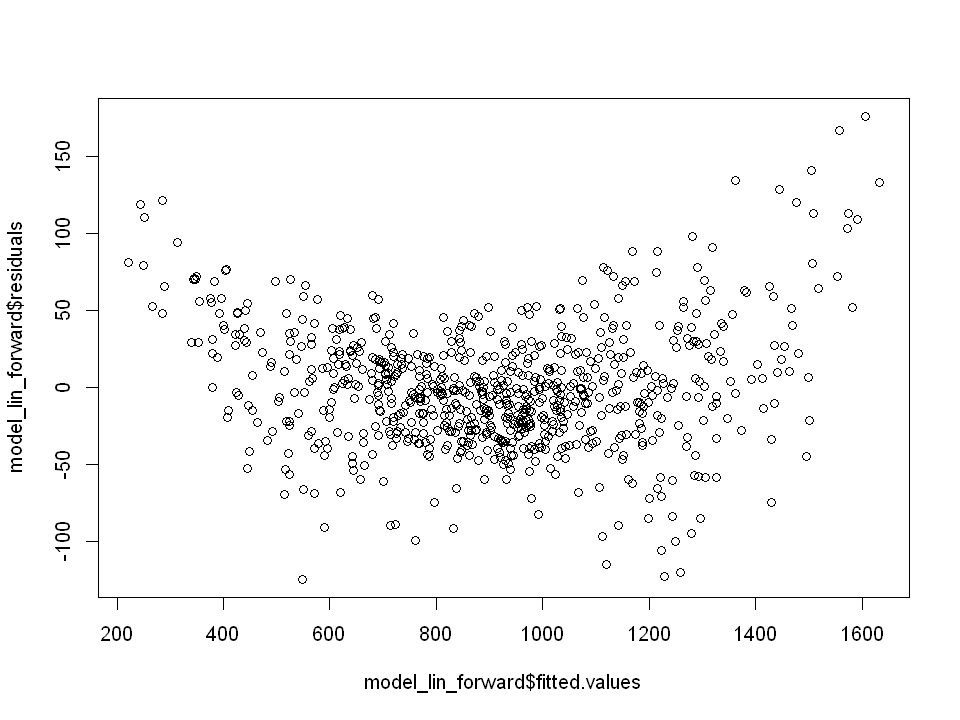

In [23]:
plot(model_lin_forward$fitted.values, model_lin_forward$residuals)

On a toujours cette tendance quadratique (hétéroscédacticité) des résidus. Pour le prochain modèle, on va ajouter les interactions pour voir ce phénomène disparaître.

In [24]:
pred_model_lin_forward <- predict(model_lin_forward, gym_test)
mse_lm_forward <- MSE(calories_burned_test,pred_model_lin_forward)
R2_lm_forward <- R2(calories_burned_test,pred_model_lin_forward)
bic_lm_forward <- BIC(model_lin_forward)
paste("MSE: ",mse_lm_forward,sep="")
paste("R2: ",R2_lm_forward ,sep="")
paste("BIC: ",bic_lm_forward ,sep="")

[1] "MSE: 1548.20345059425"

[1] "R2: 0.977213333668229"

[1] "BIC: 7990.16103501516"

On a des résultats légèrement meilleurs mais pas d'amélioration notable.

On part d'un modèle intercept-only et avec une sélection de variable forward par AIC, on va ajouter au fur et à mesure les variables ou interactions entre variables qui font baisser le plus cet indicateur.

In [25]:
t1<-Sys.time()
empty_model<-lm(calories_burned_train~1,data=gym_train)
full_model_int <- lm(calories_burned_train~.^2,data=gym_train)
model_lin_forward_int <- stepAIC(empty_model, direction = "forward", scope = formula(full_model_int), trace = 0)
t2<-Sys.time()
lin_fwd_int_reg_durantion <- t2-t1
summary(model_lin_forward_int)


Call:
lm(formula = calories_burned_train ~ Session_Duration..hours. + 
    Avg_BPM + GenderFemale + Age + Workout_TypeStrength + LBMI + 
    Resting_BPM + Workout_Frequency..days.week. + Max_BPM + Water_Intake..liters. + 
    Session_Duration..hours.:Avg_BPM + Session_Duration..hours.:GenderFemale + 
    Session_Duration..hours.:Age + Avg_BPM:GenderFemale + Avg_BPM:Age + 
    GenderFemale:Age + Session_Duration..hours.:Workout_TypeStrength + 
    LBMI:Resting_BPM + Workout_TypeStrength:LBMI + GenderFemale:Workout_TypeStrength + 
    LBMI:Max_BPM + Avg_BPM:Workout_Frequency..days.week., data = gym_train)

Residuals:
   Min     1Q Median     3Q    Max 
-71.03 -17.19  -0.88  14.97  80.28 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   -4.928e+02  1.951e+02  -2.526
Session_Duration..hours.                       2.024e+02  3.568e+01   5.673
Avg_BPM                                        1.047e+00  3.3

Le modèle forward avec interactions sélectionne beaucoup de variables qui ne semblent pas nécessairement utiles pour la prédiction.

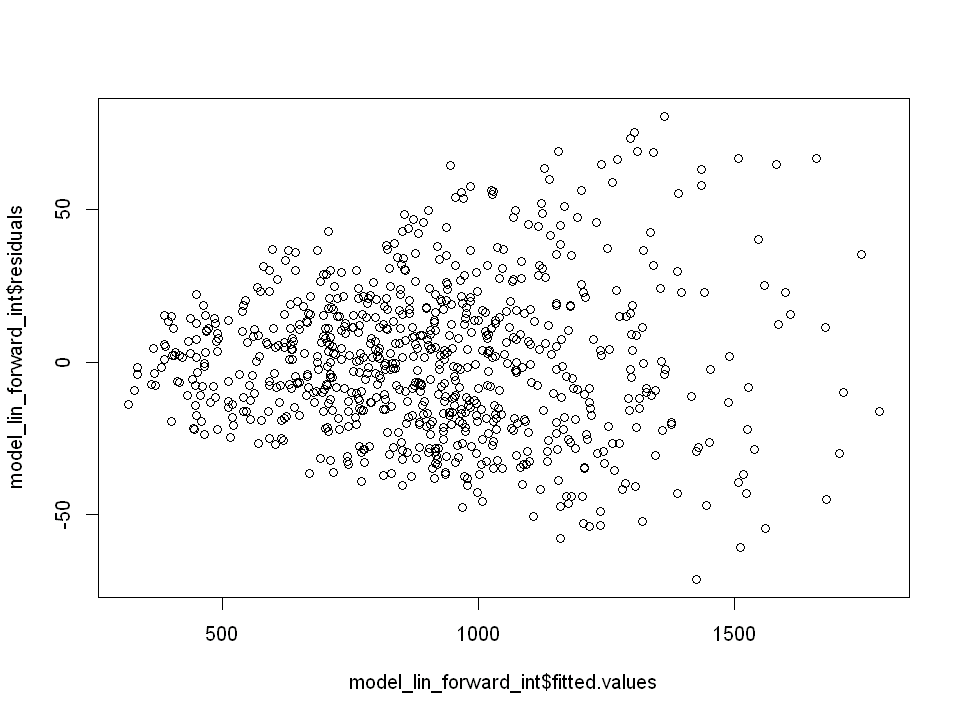

In [26]:
plot(model_lin_forward_int$fitted.values, model_lin_forward_int$residuals)

Ce modèle linéaire avec interactions ne vérifie toujours pas l'hypothèse d'homoscédasticité, mais nous n'avons plus la pseudo-dépendance quadratique des résidus
par rapport aux valeurs prédites observée précédemment avec le modèle sans interactions.

In [27]:
pred_model_lfi <- predict(model_lin_forward_int, gym_test)
mse_lm_forward_int <- MSE(calories_burned_test,pred_model_lfi)
R2_lm_forward_int <- R2(calories_burned_test,pred_model_lfi)
bic_lm_forward_int <- BIC(model_lin_forward_int)
paste("MSE: ",mse_lm_forward_int,sep="")
paste("R2: ",R2_lm_forward_int ,sep="")
paste("BIC: ",bic_lm_forward_int ,sep="")

[1] "MSE: 672.708286329191"

[1] "R2: 0.990098989087437"

[1] "BIC: 7349.18449639482"

Le modèle forward avec interactions donne des résultats largement meilleurs que celui sans interactions, on voit en effet que la MSE sur le jeu de test a été divisée par un facteur supérieur à 2. 

#### c. Avec une pénalisation (LASSO / Ridge)

[1] "CV estimate of lambda : 1.459"

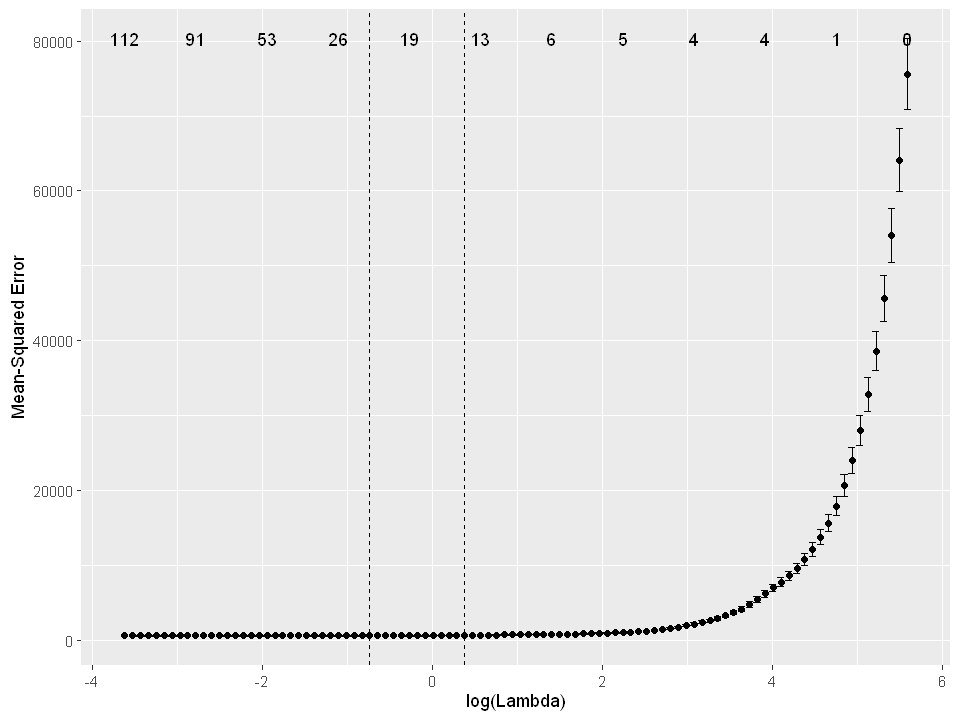

In [28]:

t1<-Sys.time()
x.mat <- model.matrix(calories_burned_train ~ .^2 - 1, data = gym_train)
reg.lasso.cv <- cv.glmnet(y = calories_burned_train, x = x.mat)
t2<-Sys.time()
lasso_reg_duration=t2-t1
autoplot(reg.lasso.cv)
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))

La validation croisée sur le modèle LASSO avec interactions suggère un paramètre lambda de pénalisation L1 égal à 1.459, en choisissant le 1SE car il donne un modèle plus simple avec moins de variables, mais des performances similaires sur le jeu de données d'apprentissage.

In [29]:
#coef(reg.lasso.cv, s = "lambda.1se")

In [30]:
x.mat_test <- model.matrix(calories_burned_test ~ .^2 - 1, data = gym_test)
fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat_test)
mse_lasso <- MSE(calories_burned_test,fit.lasso.1se)
R2_lasso  <- R2(calories_burned_test,fit.lasso.1se)
#bic_lasso  <- performance::BIC(reg.lasso.cv)
paste("MSE: ",mse_lasso ,sep="")
paste("R2: ",R2_lasso ,sep="")
#paste("BIC: ",bic_lasso ,sep="")

[1] "MSE: 746.481362333704"

[1] "R2: 0.989013187046021"

Les résultats avec LASSO sont moins bons en terme de MSE que le modèle linéaire avec interactions, mais considérablement meilleurs que les modèles linéaires sans interactions.

## KNN

,k
,<dbl>
2,10


[1] "MSE: 43383.7054639175"

[1] "R2: 0.361472795928297"

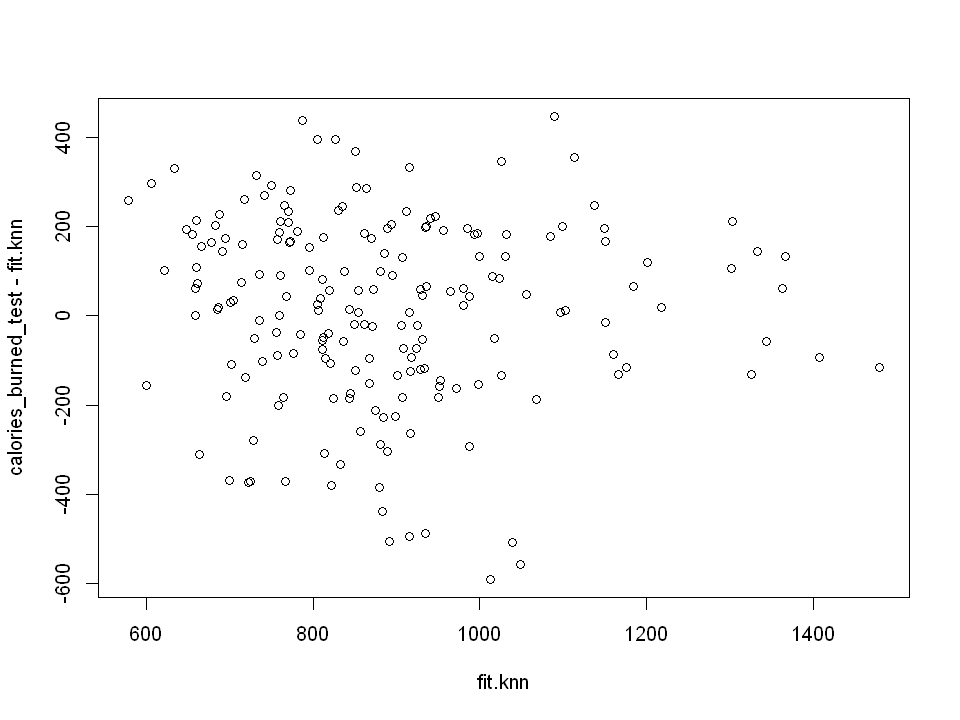

In [31]:
control <- trainControl(method = "cv", number = 5, verbose = FALSE)

grid <- expand.grid(
  k = c(5,10,15,20)    
)

t1<-Sys.time()
knn_model<-train(x = gym_train, y = calories_burned_train, method = "knn",trControl = control,verbose = FALSE,tuneGrid = grid)
fit.knn <- predict(knn_model, newdata = gym_test)
t2<-Sys.time()
knn_duration<-t2-t1
knn_model$bestTune
mse_knn <- MSE(calories_burned_test,fit.knn)
R2_knn  <- R2(calories_burned_test,fit.knn)
paste("MSE: ",mse_knn ,sep="")
paste("R2: ",R2_knn ,sep="")
plot(fit.knn,calories_burned_test - fit.knn)

Même avec une validation croisée pour sélectionner le paramètre optimal pour la méthode des k plus proches voisins, on obtient des résultats assez médiocres. Cette méthode ne semble pas être adaptée pour notre problème de régression. Il ne semble pas y avoir de biais systématique au niveau des résidus.

# SVR

,C
,<dbl>
2,1


[1] "MSE: 1543.60279966084"

[1] "R2: 0.977281046666601"

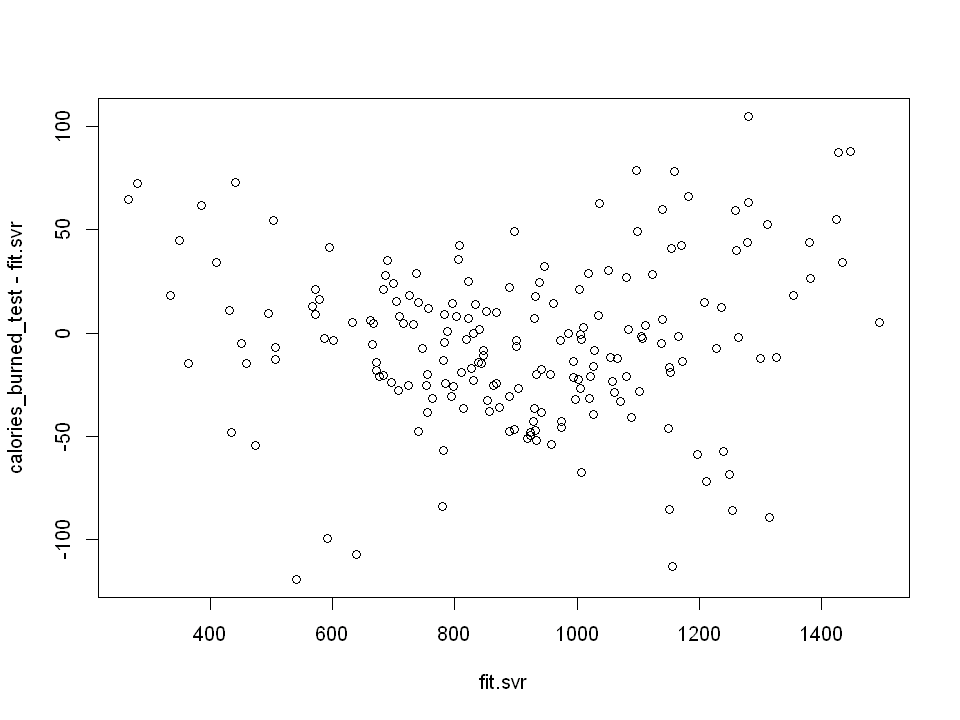

In [45]:
control <- trainControl(method = "cv", number = 5)

grid <- expand.grid(
  C = c(0.1,1,5,10)    
)

t1<-Sys.time()
svr <- train(x = gymr_train, y = calories_burned_train, method = "svmLinear",trControl = control,verbose = FALSE,tuneGrid = grid)
fit.svr <- predict(svr, newdata = gymr_test)
t2<-Sys.time()
svr_duration<-t2-t1
svr$bestTune
mse_svr <- MSE(calories_burned_test,fit.svr)
R2_svr  <- R2(calories_burned_test,fit.svr)
paste("MSE: ",mse_svr ,sep="")
paste("R2: ",R2_svr ,sep="")
plot(fit.svr,calories_burned_test - fit.svr)

On utilise un kernel de type linéaire pour la Support Vector Regression car on remarque que les méthodes linéaires donnaient déjà de bons résultats. Les résultats sont plutôt bons mais il n'y a pas de réelle plus-value par rapport aux méthodes linéaires classiques. D'ailleurs, le modèle a plus de mal à prédire les profils "extrêmes", on voit en effet que la répartition des résidus en fonction des valeurs prédites s'amincit au centre.

## Arbres

In [33]:
#install.packages("rpart.plot")


Regression tree:
rpart(formula = calories_burned_train ~ ., data = gym_train, 
    method = "anova")

Variables actually used in tree construction:
[1] Avg_BPM                  Session_Duration..hours.

Root node error: 59062499/779 = 75818

n= 779 

        CP nsplit rel error  xerror      xstd
1 0.543049      0   1.00000 1.00186 0.0504515
2 0.134524      1   0.45695 0.46563 0.0247998
3 0.104402      2   0.32243 0.33348 0.0154000
4 0.034601      3   0.21802 0.22861 0.0123977
5 0.030311      4   0.18342 0.20055 0.0115128
6 0.017611      5   0.15311 0.16923 0.0084360
7 0.011993      6   0.13550 0.15222 0.0081204
8 0.010000      7   0.12351 0.14360 0.0080095


[1] 0.01

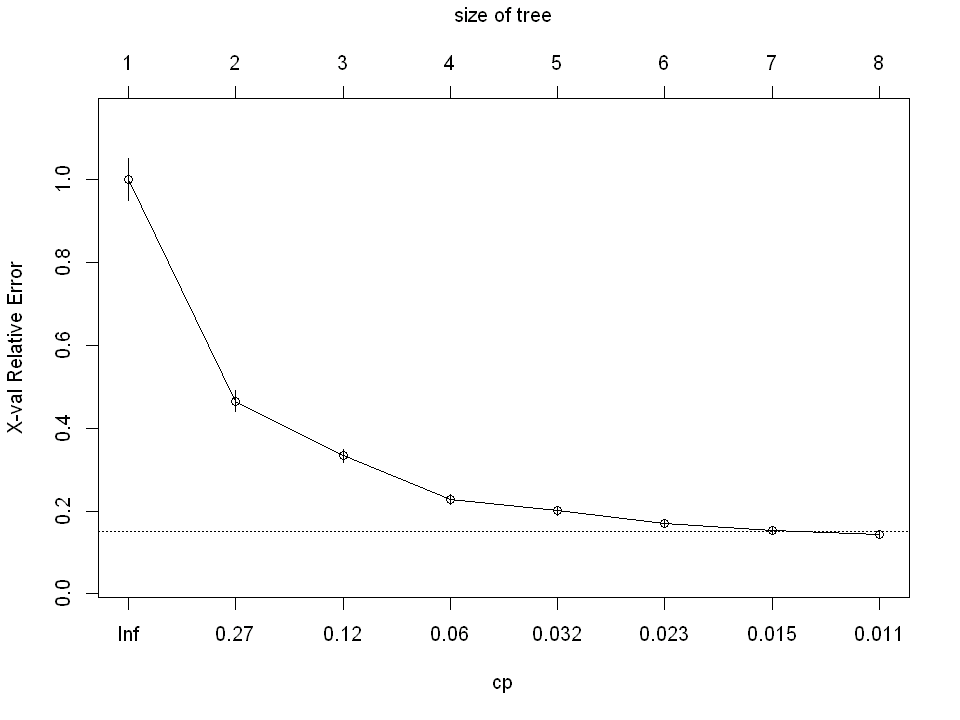

[1] "MSE apprentissage: 2516.25477606124"

[1] "MSE: 13024.8954171962"

[1] "R2: 0.808297839819475"

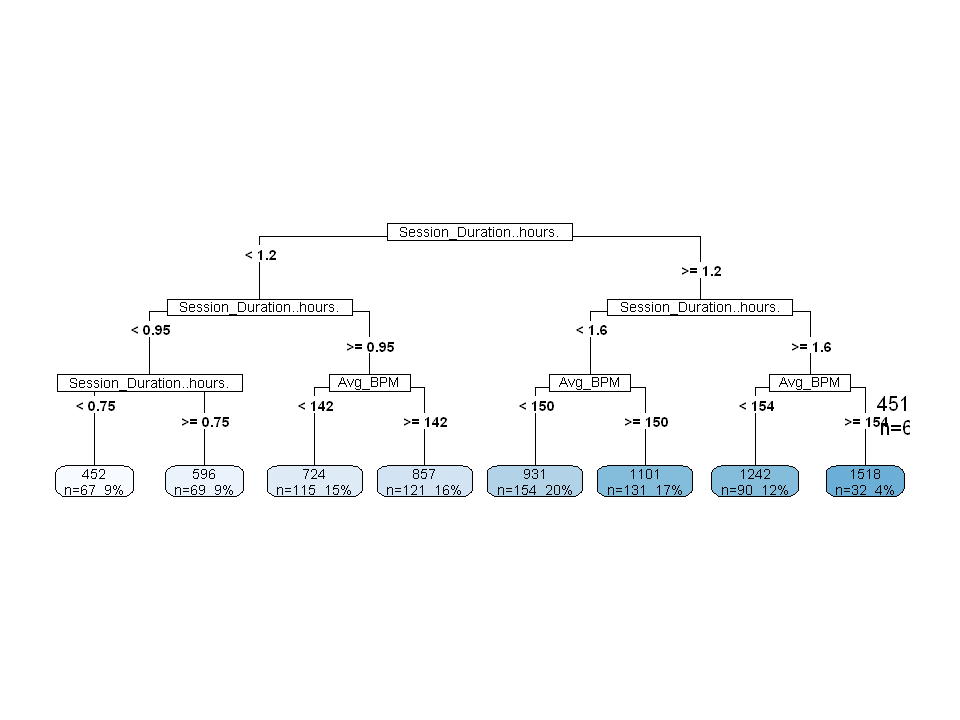

In [57]:
t1<-Sys.time()

tree.fit <- rpart(calories_burned_train ~ ., data = gym_train, method = "anova")

printcp(tree.fit)
plotcp(tree.fit)

optimal_cp <- tree.fit$cptable[which.min(tree.fit$cptable[,"xerror"]), "CP"]
optimal_cp
pruned_fit <- prune(tree.fit, cp = optimal_cp)

rpart.plot(pruned_fit, type=5,extra=101)
text(pruned_fit, use.n = TRUE)
pred.treer=predict(pruned_fit,newdata=gym_test)

t2<-Sys.time()
tree_duration<-t2-t1
mse_appr_treer <- MSE(calories_burned_train, predict(tree,newdata=gym_train))
paste("MSE apprentissage: ",mse_appr_treer,sep="")

mse_treer <- MSE(calories_burned_test,pred.treer)
R2_treer <- R2(calories_burned_test,pred.treer)
paste("MSE: ",mse_treer ,sep="")
paste("R2: ",R2_treer ,sep="")

On construit l'arbre de régression complet, on remarque que seules deux variables sont utilisées, ce sont les variables les plus importantes déjà vues précédemment : durée de la session et BPM. On optimise ensuite le paramètre de complexité cp qui correspond à la taille de l'arbre élagué par validation croisée. On obtient ainsi un arbre assez court. Les résultats en terme de R2 sont assez mauvais comparés aux autres méthodes et on remarque d'ailleurs qu'on fait de l'overfitting (le MSE sur le jeu d'apprentissage est d'un ordre de grandeur différent que celui sur le jeu de test).

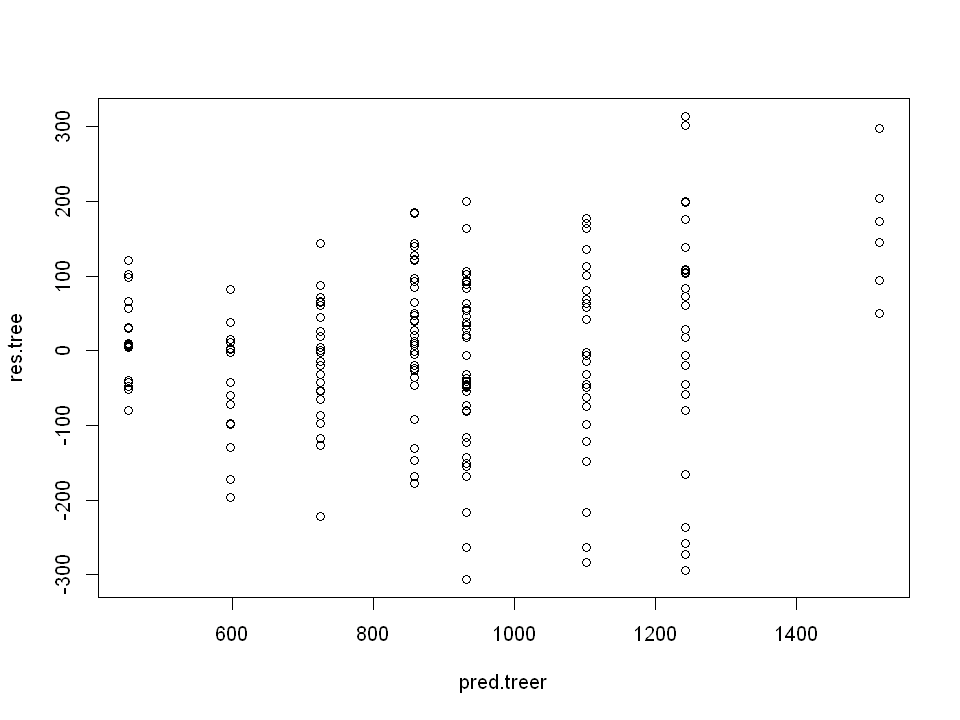

In [60]:
res.tree=pred.treer-calories_burned_test
plot(pred.treer,res.tree)

On remarque que l'arbre a tendance à surestimer les calories brûlées par les sportifs les plus actifs.

## RandomForest

In [61]:
grid <- expand.grid(mtry = seq(10, 18, by = 1), splitrule = "variance", min.node.size = seq(1, 10, by = 1))

t1<-Sys.time()
rf <- train(x = gym_train, y = calories_burned_train, method = "ranger", trControl = control, tuneGrid = grid, num.trees = 100, importance = "impurity")
pred.rf=predict(rf,newdata=gym_test)
t2<-Sys.time()
rf_duration<-t2-t1
rf$bestTune

,mtry,splitrule,min.node.size
,<dbl>,<fct>,<dbl>
42,14,variance,2


On effectue de la validation croisée sur le nombre de variables tirées aléatoirement à chaque split parmi lesquelles on peut choisir (mtry) et le nombre minimal d'individus dans chaque feuille (min.node.size).

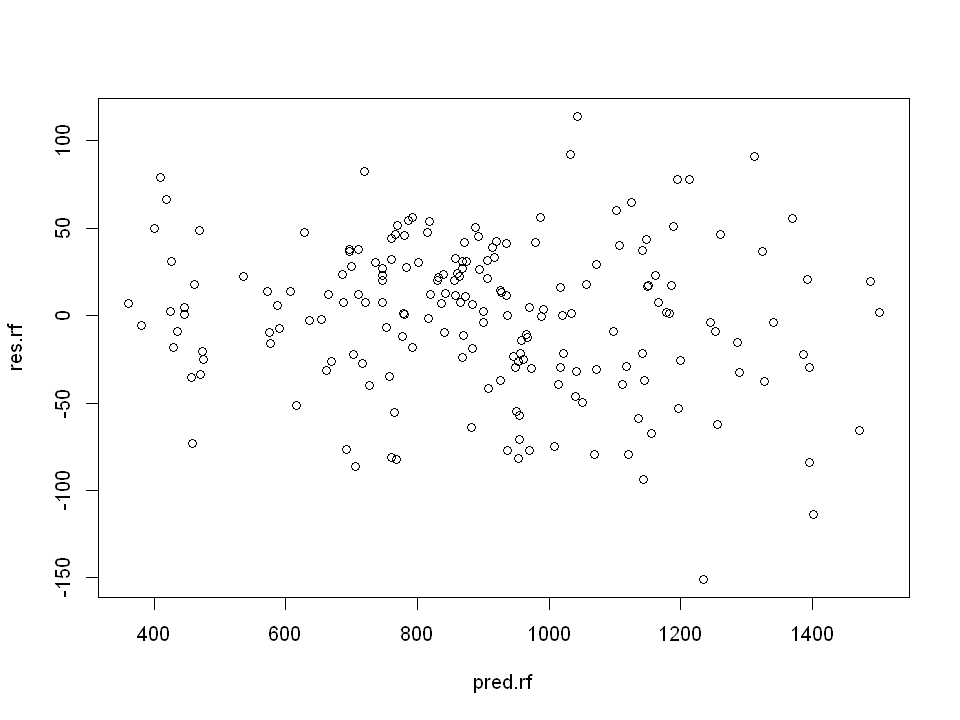

In [62]:
res.rf=pred.rf-calories_burned_test
plot(pred.rf,res.rf)

Il ne semble pas y avoir de biais systématique pour Random Forest.

In [63]:
varImp(rf)

ranger variable importance

                                Overall
Session_Duration..hours.      1.000e+02
Avg_BPM                       1.529e+01
Fat_Percentage                8.802e+00
Experience_Level3             8.217e+00
Age                           2.713e+00
Experience_Level2             1.558e+00
LWeight..kg.                  8.346e-01
GenderMale                    6.075e-01
GenderFemale                  5.510e-01
Height..m.                    5.383e-01
Water_Intake..liters.         4.807e-01
LBMI                          4.338e-01
Resting_BPM                   3.528e-01
Max_BPM                       3.350e-01
Workout_Frequency..days.week. 1.026e-01
Workout_TypeStrength          3.203e-02
Workout_TypeHIIT              2.939e-03
Workout_TypeYoga              0.000e+00

En utilisant le critère d'impureté, les variables jugées les plus importantes sont sensiblement les mêmes que celles obtenues avec les autres méthodes.

In [64]:
# Erreur quadratique moyenne de prévision
mse_appr_rf <- MSE(calories_burned_train, predict(rf, newdata = gym_train))
paste("MSE sur le jeu d'apprentissage : ", mse_appr_rf, sep = "")

mse_rfr <- MSE(calories_burned_test,pred.rf)
R2_rfr <- R2(calories_burned_test,pred.rf)
paste("MSE: ",mse_rfr ,sep="")
paste("R2: ",R2_rfr ,sep="")

[1] "MSE sur le jeu d'apprentissage : 275.331586617458"

[1] "MSE: 1810.61217603093"

[1] "R2: 0.973351166801997"

La forêt aléatoire a des performances largement meilleures que l'arbre de régression classique, ce qui est rassurant. En revanche, ses performances ne sont pas bien meilleures que les régressions linéaires pour un niveau de complexité et un temps d'optimisation des hyperparamètres plus important. On retrouve également le problème d'overfitting observé avec l'arbre de régression.

# Boosting

On ajuste plusieurs hyper-paramètres à la fois : nombres d'arbres (n.trees), profondeur max des arbres utilisés (interaction.depth), taux d'apprentissage (shrinkage) et taille minimale des feuilles (n.minobsinnode). On fixe la taille des échantillons boostrap utilisés à 80% de la taille du jeu d'apprentissage complet car c'est ce qui fonctionnait le mieux en Python.

In [70]:
set.seed(3)
control <- trainControl(method = "cv", number = 5)

grid <- expand.grid(
  n.trees = c(250,500,1000),           
  interaction.depth = c(1,2,5),        
  shrinkage = c(0.02, 0.05,0.1),
    n.minobsinnode = c(5, 10, 20)
)

t1<-Sys.time()
gbm.reg <- train(x = gym_train, y = calories_burned_train,method = "gbm",trControl = control,verbose = FALSE,tuneGrid = grid,bag.fraction = 0.8)

pred.test=predict(gbm.reg,newdata=gym_test)

t2<-Sys.time()
gbm_duration<-t2-t1
gbm.reg$bestTune

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
42,1000,2,0.05,10


In [71]:
# Erreur quadratique moyenne de prévision
mse_appr_gb <- MSE(calories_burned_train, predict(gbm.reg, newdata = gym_train))
paste("MSE sur le jeu d'apprentissage : ", mse_appr_gb, sep = "")

mse_gb <- MSE(calories_burned_test,pred.test)
R2_gb <- R2(calories_burned_test,pred.test)
paste("MSE: ",mse_gb ,sep="")
paste("R2: ",R2_gb ,sep="")

[1] "MSE sur le jeu d'apprentissage : 67.2920015052709"

[1] "MSE: 171.748446879532"

[1] "R2: 0.997472183290548"

Le gradient boosting offre d'excellents résultats de prédiction sur le jeu de test, mais pour une complexité de calcul plus importante.

# Réseau de neurones

In [ ]:
set.seed(48)
gym_train$calories_burned_train <- calories_burned_train
t1<-Sys.time()
nnet.reg.tune<-tune.nnet(calories_burned_train~.,data=gym_train,size=c(7,8,9,10),decay=c(1,2,3),maxit=2000,linout=TRUE)
nnet.reg=nnet(calories_burned_train~.,data=gym_train,size=8,decay=2,linout=TRUE,maxit=20000)
pred.test.nnet.reg=predict(nnet.reg,newdata=gym_test)
t2<-Sys.time()
nnet_duration<-t2-t1
nnet.reg.tune
plot(nnet.reg.tune)

In [ ]:
set.seed(48)
nnet.reg=nnet(calories_burned_train~.,data=gym_train,size=8,decay=2,linout=TRUE,maxit=20000)

fit.nnet.reg <- predict(nnet.reg, data = gym_test)
pred.test.nnet.reg=predict(nnet.reg,newdata=gym_test)

mse_appr_nnet <- MSE(calories_burned_train, predict(nnet.reg, newdata = gym_train))
paste("MSE sur le jeu d'apprentissage : ", mse_appr_nnet, sep = "")

mse_nnet <- MSE(calories_burned_test,pred.test.nnet.reg)
R2_nnet <- R2(calories_burned_test,pred.test.nnet.reg)
paste("MSE: ",mse_nnet ,sep="")
paste("R2: ",R2_nnet ,sep="")

res.nnet.reg=fit.nnet.reg -calories_burned_test
plot(fit.nnet.reg ,res.nnet.reg)

## Tableau récapitulatif

In [ ]:
recap <- data.frame(
  MSE= c(mse_lm_full,mse_lm_forward_int,mse_lasso),
    R2=c(R2_lm_full,R2_lm_forward_int,R2_lasso),
  Execution_time = c(lin_reg_duration,lin_fwd_reg_duration,lin_fwd_int_reg_duration)
)
rownames(recap) <- c('RegLinSansPen','RegLinForward','RegLinLasso','KNN','SVR','Tree','RandomForest','GradientBoosting','NeuralNetwork')

recap

# III.Classification: Experience_Level

In [ ]:
# 1. Colonnes catégorielles → variables indicatrices (one-hot encoding)
gym_dummies <- model.matrix(~ Gender + Workout_Type - 1, data = gym) %>% as.data.frame()

# 2. Colonnes numériques (quantitatives)
gym_quant <- gym %>% dplyr::select(
  Age, Height..m., Max_BPM, Avg_BPM, Resting_BPM,
  Session_Duration..hours.,Calories_Burned, Fat_Percentage, Water_Intake..liters.,
  Workout_Frequency..days.week., LWeight..kg., LBMI
)

# 3. Combinaison des deux en un seul dataset
gym_new <- bind_cols(gym_dummies, gym_quant)

# 4. Variable cible
experience_level <- gym$Experience_Level
#use 80% of dataset as training set and 20% as test set
sample <- sample(c(TRUE, FALSE), nrow(gym_new), replace=TRUE, prob=c(0.8,0.2))
gym_train  <- gym_new[sample, ]
gym_test   <- gym_new[!sample, ]
experience_level_train <- experience_level[sample]
experience_level_test <- experience_level[!sample]

gym_r <- scale(gym_new)
# Standardisation des données d'entraînement
gymr_train <- gym_r[sample, ]
gymr_test <- gym_r[!sample, ]

#Accuracy score for classification
accuracy_score<- function(Y,Y_pred) {
    t<-table(Y_pred,Y)
    return(sum(diag(t))/sum(t))    
}

## Régression multinomiale

In [ ]:
t1<-Sys.time()
reglog<-multinom(experience_level_train~.,data=gym_train)
t2<-Sys.time()
reglog_duration<-t2-t1

In [ ]:
summary(reglog)

In [ ]:
reglog_pred<-predict(reglog,newdata=gym_test)
print(table(reglog_pred,experience_level_test))
reglog_acc<-accuracy_score(reglog_pred,experience_level_test)
paste("Accuracy: ",reglog_acc ,sep="")

## Régression multinomiale forward selection

In [ ]:
model_start <- multinom(experience_level_train ~ 1, data = gym_train, trace = FALSE)

# Modèle maximal (toutes les variables)
model_full <- multinom(experience_level_train ~ ., data = gym_train, trace = FALSE)

t1<-Sys.time()
# Forward selection avec AIC
reglog_forward <- stepAIC(model_start, 
                        scope = list(upper = model_full, lower = model_start),
                        direction = "forward",
                        trace = TRUE)
t2<-Sys.time()
reglog_forward_duration<-t2-t1
# Résumé du modèle final
summary(reglog_forward)

In [ ]:
reglog_forward_pred<-predict(reglog_forward,newdata=gym_test)
print(table(reglog_forward_pred,experience_level_test))
reglog_forward_acc<-accuracy_score(reglog_forward_pred,experience_level_test)
paste("Accuracy: ",reglog_forward_acc ,sep="")

## Régression Logistique LASSO

In [ ]:
x.mat <- model.matrix(experience_level_train ~ . - 1, data = gym_train)
t1<-Sys.time()
reglog_lasso.cv<-cv.glmnet(x=x.mat,y=experience_level_train,family="multinomial",alpha=1)
t2<-Sys.time()
reglog_lasso_duration<-t2-t1
options(repr.plot.width=8,repr.plot.height=6)
autoplot(reglog_lasso.cv)
paste("CV estimate of lambda :", round(reglog_lasso.cv$lambda.1se, 3))

In [ ]:
coef_1se <- coef(reglog_lasso.cv, s = "lambda.1se")
print(coef_1se)

In [ ]:
x.mat_test <- model.matrix(experience_level_test ~ . - 1, data = gym_test)
fit.lasso.1se <- predict(reglog_lasso.cv, s = "lambda.1se", newx = x.mat_test,type="class")
print(table(fit.lasso.1se,experience_level_test))
reglog_lasso_acc<-accuracy_score(fit.lasso.1se,experience_level_test)
paste("Accuracy: ",reglog_lasso_acc ,sep="")

## KMeans

In [ ]:
# Fonction qui va permettre de matcher les classes réelles et celles obtenues avec Kmeans
correspondence_score <- function(classif1, classif2) {
  # Créer la matrice de confusion
  cm <- table(classif1, classif2)
  cm <- as.matrix(cm)
  
  total <- sum(cm)
  sum_score <- 0
  
  for (i in 1:3) {
    # Trouver l'indice du maximum
    max_idx <- which(cm == max(cm), arr.ind = TRUE)[1, ]
    
    # Ajouter la valeur maximale à la somme
    sum_score <- sum_score + cm[max_idx[1], max_idx[2]]
    
    # Supprimer la ligne
    cm <- cm[-max_idx[1], , drop = FALSE]
    
    # Supprimer la colonne
    cm <- cm[, -max_idx[2], drop = FALSE]
  }
  
  return(sum_score / total)
}

In [ ]:
acp <- PCA(gym, scale.unit = TRUE,
           graph = FALSE,quali.sup = c(2,9,13), ncp=6)

In [ ]:
acp_coord<-acp$ind$coord
t1<-Sys.time()
kmeans<-kmeans(acp_coord,3,iter.max=100)
t2<-Sys.time()
kmeans_duration<-t2-t1
km_classif<-kmeans$cluster[!sample]
print(table(km_classif,experience_level_test))
kmeans_acc<-correspondence_score(km_classif,experience_level_test)
paste("Accuracy: ",kmeans_acc ,sep="")

## KNN

In [ ]:
plot(tune.knn(gym_train, experience_level_train, k = 1:20, tunecontrol = tune.control(sampling = "cross")))

In [ ]:
t1<-Sys.time()
knn_classif<-knn(train=gym_train,test=gym_test,cl=experience_level_train,k=5)
t2<-Sys.time()
knn_duration<-t2-t1
print(table(knn_classif,experience_level_test))
knn_acc<-correspondence_score(knn_classif,experience_level_test)
paste("Accuracy: ",knn_acc ,sep="")

## SVC

In [ ]:
svm.tune<-tune.svm(gym_train,experience_level_train,cost=c(0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,1),gamma=seq(0.002,0.4,0.002), tunecontrol = tune.control(sampling = "cross"))
plot(svm.tune)
svm.tune

In [ ]:
t1<-Sys.time()
#svc = svm(experience_level_train ~ ., data = gymr_train, cost = 0.15, gamma=gamma, kernel = "radial")
svc = svm(experience_level_train ~ ., data = gymr_train, cost = 0.15, kernel = "linear")
t2<-Sys.time()
svc_duration<-t2-t1
summary(svc)

In [ ]:
fit.svc <- predict(svc, newdata = gymr_test)
print(table(fit.svc,experience_level_test))
svc_acc<-correspondence_score(fit.svc,experience_level_test)
paste("Accuracy: ",svc_acc ,sep="")

## Arbre

In [ ]:
tree_model <- rpart(experience_level_train ~ ., data = gym_train, method = "class", control = rpart.control(maxdepth = 7))
t1<-Sys.time()
tree_model <- rpart(experience_level_train ~ ., data = gym_train, method = "class", control = rpart.control(maxdepth = 7))
t2<-Sys.time()
tree_duration<-t2-t1
rpart.plot(tree_model)

In [ ]:
tree_predictions <- predict(tree_model, newdata = gym_test, type = "class")
print(table(tree_predictions,experience_level_test))
tree_acc<-accuracy_score(tree_predictions,experience_level_test)
paste("Accuracy: ",tree_acc ,sep="")

## RandomForest

In [ ]:
t1<-Sys.time()
rfc <-randomForest(x=gym_train,y=experience_level_train,xtest=gym_test,ytest=experience_level_test,ntree=200,do.trace=50,mtry=13,nodesize=2)
t2<-Sys.time()
rfc_duration<-t2-t1

In [ ]:
varImpPlot(rfc)

In [ ]:
rfc_pred<-as.vector(rfc$test$predicted)
print(table(rfc_pred,experience_level_test))
rfc_acc<-correspondence_score(rfc_pred,experience_level_test)
paste("Accuracy: ",rfc_acc ,sep="")

## Boosting

In [ ]:
library(gbm)

In [ ]:
t1<-Sys.time()
gbm <- gbm(
  formula = experience_level_train ~ .,
  data = gym_train,
  distribution = "multinomial",
  n.trees = 500,
  interaction.depth = 3,
  shrinkage = 0.05,
  cv.folds = 10,
  n.minobsinnode = 5
)
t2<-Sys.time()
gbm_duration<-t2-t1
summary(gbm)

In [ ]:
gbm_pred <- predict(gbm, gym_test, n.trees = gbm$n.trees, type = "response")

# La prédiction renvoie un array 150 obs × 3 classes, il faut prendre la classe la plus probable :
gbm_pred <- apply(gbm_pred, 1, function(x) colnames(gbm_pred)[which.max(x)])


print(table(gbm_pred,experience_level_test))
gbm_acc<-correspondence_score(gbm_pred,experience_level_test)
paste("Accuracy: ",gbm_acc ,sep="")

## Réseau de neurones

In [ ]:
data_train <- cbind(gym_train, experience_level_train)
tune_nn<-tune.nnet(experience_level_train~.,data=data_train,size=seq(2,15,1),decay=seq(0,5,1),trace=FALSE,tunecontrol = tune.control(sampling = "cross"))
tune_nn
plot(tune_nn)

In [ ]:
t1<-Sys.time()
nn<-nnet(experience_level_train~.,data=gymr_train,size=4,decay=1)
t2<-Sys.time()
nn_duration<-t2-t1

In [ ]:
nn_predictions <- predict(nn, newdata = gymr_test)
#Vote majoritaire
nn_predictions <- apply(nn_predictions, 1, function(x) colnames(nn_predictions)[which.max(x)])
print(table(nn_predictions,experience_level_test))
nn_acc<-accuracy_score(nn_predictions,experience_level_test)
paste("Accuracy: ",nn_acc ,sep="")

## Courbes ROC

In [ ]:
auc_reglog<-multiclass.roc(experience_level_test,as.numeric(reglog_pred))$auc
auc_reglog_forward<-multiclass.roc(experience_level_test,as.numeric(reglog_forward_pred))$auc
auc_reglog_lasso<-multiclass.roc(experience_level_test,as.numeric(reglog_lasso_pred))$auc
auc_knn<-multiclass.roc(experience_level_test,as.numeric(knn_pred))$auc
auc_kmeans<-multiclass.roc(experience_level_test,as.numeric(kmeans_pred))$auc
auc_svc<-multiclass.roc(experience_level_test,as.numeric(svc_pred))$auc
auc_tree<-multiclass.roc(experience_level_test,as.numeric(tree_pred))$auc
auc_rfc<-multiclass.roc(experience_level_test,as.numeric(rfc_pred))$auc
auc_gbm<-multiclass.roc(experience_level_test,as.numeric(gbm_pred))$auc
auc_nn<-multiclass.roc(experience_level_test,as.numeric(nn_predictions))$auc

## Tableau récapitulatif


In [ ]:
recap <- data.frame(
  Accuracy_Score = c(reglog_acc,reglog_forward_acc,reglog_lasso_acc, kmeans_acc, knn_acc, svc_acc, tree_acc, rfc_acc, gbm_acc, nn_acc),
  AUC =c(auc_reglog,auc_reglog_forward,auc_reglog_lasso,auc_kmeans,auc_knn,auc_svc,auc_tree,auc_rfc,auc_gbm,auc_nn),
  Execution_time = c(reglog_duration,reglog_forward_duration,reglog_lasso_duration, kmeans_duration, knn_duration, svc_duration, tree_duration, rfc_duration, gbm_duration, nn_duration)
)
rownames(recap) <- c('RegMultinomSansPen','RegMultinomForward','RegMultinomLasso','KMeans','KNN','SVC','Tree','RandomForest','GradientBoosting','NeuralNetwork')

recap
